# **Home Credit Indonesia Default Risk**
`Raden Dissa Shafira | FTDS RMT-019 | 14/06/2023 `

# I. Introduction

PT Home Credit Indonesia adalah perusahaan keuangan yang menyediakan layanan pembiayaan kepada pelanggan yang melakukan pembelian baik secara online maupun offline. Sebagai perusahaan `pembiayaan`, Home Credit sangat memerlukan analisis keuangan yang baik untuk mengelola dana pinjaman dengan efektif dan mengatasi risiko keuangan yang mungkin terjadi. Analisis ini diperlukan untuk mengelola dana pinjaman, memperkirakan risiko kredit, menentukan suku bunga yang tepat, dan memastikan kelayakan keuangan pelanggan untuk membayar kembali pinjaman. 

Home Credit Indonesia kini sedang membutuhkan model prediksi untuk mengklasifikasikan golongan pemilik kredit yang membayar tagihan dan gagal bayar (*default*). Untuk melakukan hal tersebut akan digunakan dataset yang berisikan informasi mengenai *client*, demografi *client*, hingga transaksi *client*. Dalam proyek ini, klasifikasi terbagi atas golongan yang melaksanakan pembayaran (index = 0) serta golongan gagal bayar (index = 1).


**Problem statement:** 

Diperlukan model klasifikasi dengan akurasi tinggi untuk dapat memprediksi *default payment* kredit online. Diperlukan adanya percobaan beberapa jenis model untuk dapat membandingkan serta mendapatkan model paling akurat dengan menggunakan beberapa metrik tertentu. ROC-AUC akan digunakan sebagai metrik utama untuk menilai kinerja model secara keseluruhan--sementara metrik lain seperti akurasi dan recall juga akan digunakan sebagai alat analisis tambahan dan pendukung untuk mengukur keberhasilan model.


**Dataset**:
Dataset yang akan digunakan adalah dataset [Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk/discussion/64821) yang diterbitkan pada tahun 2018. Berikut adalah deskripsi kolom dari dari tabel utama, "Application":


| No. | File Name                      | Column Name                   | Description                                                                                   |
|-----|--------------------------------|-------------------------------|-----------------------------------------------------------------------------------------------|
| 1   | application_{train\|test}.csv  | SK_ID_CURR                    | ID of loan in our sample                                                                      |
| 2   | application_{train\|test}.csv  | NAME_CONTRACT_TYPE            | Identification if loan is cash or revolving                                                    |
| 3   | application_{train\|test}.csv  | CODE_GENDER                   | Gender of the client                                                                          |
| 4   | application_{train\|test}.csv  | FLAG_OWN_CAR                  | Flag if the client owns a car                                                                 |
| 5   | application_{train\|test}.csv  | FLAG_OWN_REALTY               | Flag if client owns a house or flat                                                           |
| 6   | application_{train\|test}.csv  | CNT_CHILDREN                  | Number of children the client has                                                             |
| 7   | application_{train\|test}.csv  | AMT_INCOME_TOTAL              | Income of the client                                                                          |
| 8   | application_{train\|test}.csv  | AMT_CREDIT                    | Credit amount of the loan                                                                     |
| 9   | application_{train\|test}.csv  | AMT_ANNUITY                   | Loan annuity                                                                                  |
| 10  | application_{train\|test}.csv  | AMT_GOODS_PRICE               | For consumer loans, it is the price of the goods for which the loan is given                    |
| 11  | application_{train\|test}.csv  | NAME_TYPE_SUITE               | Who was accompanying the client when they were applying for the loan                           |
| 12  | application_{train\|test}.csv  | NAME_INCOME_TYPE              | Client's income type (businessman, working, maternity leave, etc.)                             |
| 13  | application_{train\|test}.csv  | NAME_EDUCATION_TYPE           | Level of the highest education the client achieved                                            |
| 14  | application_{train\|test}.csv  | NAME_FAMILY_STATUS            | Family status of the client                                                                   |
| 15  | application_{train\|test}.csv  | NAME_HOUSING_TYPE             | Housing situation of the client (renting, living with parents, etc.)                          |
| 16  | application_{train\|test}.csv  | REGION_POPULATION_RELATIVE    | Normalized population of the region where the client lives                                    |
| 17  | application_{train\|test}.csv  | DAYS_BIRTH                    | Client's age in days at the time of application                                               |
| 18  | application_{train\|test}.csv  | DAYS_EMPLOYED                 | How many days before the application the person started current employment                     |
| 19  | application_{train\|test}.csv  | DAYS_REGISTRATION             | How many days before the application did the client change their registration                  |
| 20  | application_{train\|test}.csv  | DAYS_ID_PUBLISH               | How many days before the application did the client change the identity document they applied with |
| 21  | application_{train\|test}.csv  | OWN_CAR_AGE                   | Age of the client's car                                                                       |
| 22  | application_{train\|test}.csv  | FLAG_MOBIL                    | Did the client provide a mobile phone (1=YES, 0=NO)                                            |
| 23  | application_{train\|test}.csv | FLAG_EMP_PHONE                | Did the client provide a work phone (1=YES, 0=NO)                                              |
| 24  | application_{train\|test}.csv | FLAG_CONT_MOBILE              | Was mobile phone reachable (1=YES, 0=NO)                                                       |
| 25  | application_{train\|test}.csv | FLAG_PHONE                    | Did the client provide a home phone (1=YES, 0=NO)                                              |
| 26  | application_{train\|test}.csv | FLAG_EMAIL                    | Did the client provide an email address (1=YES, 0=NO)                                          |
| 27  | application_{train\|test}.csv | OCCUPATION_TYPE               | What kind of occupation does the client have                                                   |
| 28  | application_{train\|test}.csv | CNT_FAM_MEMBERS               | How many family members does the client have                                                   |
| 29  | application_{train\|test}.csv | REGION_RATING_CLIENT          | Our rating of the region where the client lives (1,2,3)                                        |
| 30  | application_{train\|test}.csv | REGION_RATING_CLIENT_W_CITY   | Our rating of the region where the client lives with taking city into account (1,2,3)          |
| 31  | application_{train\|test}.csv | WEEKDAY_APPR_PROCESS_START    | On which day of the week did the client apply for the loan                                     |
| 32  | application_{train\|test}.csv | HOUR_APPR_PROCESS_START       | Approximately at what hour did the client apply for the loan                                   |
| 33  | application_{train\|test}.csv | REG_REGION_NOT_LIVE_REGION    | Flag if client's permanent address does not match contact address (1=YES, 0=NO)                |
| 34  | application_{train\|test}.csv | REG_REGION_NOT_WORK_REGION    | Flag if client's permanent address does not match work address (1=YES, 0=NO)                   |
| 35  | application_{train\|test}.csv | LIVE_REGION_NOT_WORK_REGION   | Flag if client's contact address does not match work address (1=YES, 0=NO)                      |
| 36  | application_{train\|test}.csv | REG_CITY_NOT_LIVE_CITY        | Flag if client's permanent address does not match contact address (1=YES, 0=NO)                |
| 37  | application_{train\|test}.csv | REG_CITY_NOT_WORK_CITY        | Flag if client's permanent address does not match work address (1=YES, 0=NO)                   |
| 38  | application_{train\|test}.csv | LIVE_CITY_NOT_WORK_CITY       | Flag if client's contact address does not match work address (1=YES, 0=NO)                      |
| 39  | application_{train\|test}.csv | ORGANIZATION_TYPE             | Type of organization where client works                                                       |
| 40  | application_{train\|test}.csv | EXT_SOURCE_1                  | Normalized score from external data source 1                                                   |
| 41  | application_{train\|test}.csv | EXT_SOURCE_2                  | Normalized score from external data source 2                                                   |
| 42  | application_{train\|test}.csv | EXT_SOURCE_3                  | Normalized score from external data source 3                                                   |
| 43  | application_{train\|test}.csv | APARTMENTS_AVG                | Normalized information about apartment where client lives (average normalized by population)    |
| 44  | application_{train\|test}.csv | BASEMENTAREA_AVG              | Normalized information about basement area (average normalized by population)                   |
| 45  | application_{train\|test}.csv | YEARS_BEGINEXPLUATATION_AVG   | Average share of years the building was in use                                                |
| 46  | application_{train\|test}.csv | YEARS_BUILD_AVG               | Average share of building completed                                                           |
| 47  | application_{train\|test}.csv | COMMONAREA_AVG                | Normalized information about common area (average normalized by population)                    |
| 48  | application_{train\|test}.csv | ELEVATORS_AVG                 | Normalized information about the number of elevators (average normalized by population)        |
| 49  | application_{train\|test}.csv | ENTRANCES_AVG                 | Normalized information about the number of entrances (average normalized by population)        |
| 50  | application_{train\|test}.csv | FLOORSMAX_AVG                 | Normalized information about the number of maximum floors (average normalized by population)   |
| 51  | application_{train\|test}.csv | FLOORSMIN_AVG                 | Normalized information about the number of minimum floors (average normalized by population)   |
| 52  | application_{train\|test}.csv | LANDAREA_AVG                  | Normalized information about land area (average normalized by population)                      |
| 53  | application_{train\|test}.csv | LIVINGAPARTMENTS_AVG          | Normalized information about living area of the apartment (average normalized by population)   |
| 54  | application_{train\|test}.csv | LIVINGAREA_AVG                | Normalized information about living area (average normalized by population)                     |
| 55  | application_{train\|test}.csv | NONLIVINGAPARTMENTS_AVG       | Normalized information about non-living area of the apartment (average normalized by population)|
| 56  | application_{train\|test}.csv | NONLIVINGAREA_AVG             | Normalized information about non-living area (average normalized by population)                 |
| 57  | application_{train\|test}.csv | APARTMENTS_MODE               | Normalized information about apartment where client lives (mode normalized by population)      |
| 58  | application_{train\|test}.csv | BASEMENTAREA_MODE             | Normalized information about basement area (mode normalized by population)                     |
| 59  | application_{train\|test}.csv | YEARS_BEGINEXPLUATATION_MODE  | Mode share of years the building was in use                                                    |
| 60  | application_{train\|test}.csv | YEARS_BUILD_MODE              | Mode share of building completed                                                               |
| 61  | application_{train\|test}.csv | COMMONAREA_MODE               | Normalized information about common area (mode normalized by population)                       |
| 62  | application_{train\|test}.csv | ELEVATORS_MODE                | Normalized information about the number of elevators (mode normalized by population)           |
| 63  | application_{train\|test}.csv | ENTRANCES_MODE                | Normalized information about the number of entrances (mode normalized by population)           |
| 64  | application_{train\|test}.csv | FLOORSMAX_MODE                | Normalized information about the number of maximum floors (mode normalized by population)      |
| 65  | application_{train\|test}.csv | FLOORSMIN_MODE                | Normalized information about the number of minimum floors (mode normalized by population)      |
| 66  | application_{train\|test}.csv | LANDAREA_MODE                 | Normalized information about land area (mode normalized by population)                         |
| 67  | application_{train\|test}.csv | LIVINGAPARTMENTS_MODE         | Normalized information about living area of the apartment (mode normalized by population)      |
| 68  | application_{train\|test}.csv | LIVINGAREA_MODE               | Normalized information about living area (mode normalized by population)                        |
| 69  | application_{train\|test}.csv | NONLIVINGAPARTMENTS_MODE      | Normalized information about non-living area of the apartment (mode normalized by population)   |
| 70  | application_{train\|test}.csv | NONLIVINGAREA_MODE            | Normalized information about non-living area (mode normalized by population)                    |
| 71  | application_{train\|test}.csv | APARTMENTS_MEDI               | Normalized information about apartment where client lives (median normalized by population)    |
| 72  | application_{train\|test}.csv | BASEMENTAREA_MEDI             | Normalized information about basement area (median normalized by population)                   |
| 73  | application_{train\|test}.csv | YEARS_BEGINEXPLUATATION_MEDI  | Median share of years the building was in use                                                  |
| 74  | application_{train\|test}.csv | YEARS_BUILD_MEDI              | Median share of building completed                                                             |
| 75  | application_{train\|test}.csv | COMMONAREA_MEDI               | Normalized information about common area (median normalized by population)                     |
| 76  | application_{train\|test}.csv | ELEVATORS_MEDI                | Normalized information about the number of elevators (median normalized by population)         |
| 77  | application_{train\|test}.csv | ENTRANCES_MEDI                | Normalized information about the number of entrances (median normalized by population)         |
| 78  | application_{train\|test}.csv | FLOORSMAX_MEDI                | Normalized information about the number of maximum floors (median normalized by population)    |
| 79  | application_{train\|test}.csv | FLOORSMIN_MEDI                | Normalized information about the number of minimum floors (median normalized by population)    |
| 80  | application_{train\|test}.csv | LANDAREA_MEDI                 | Normalized information about land area (median normalized by population)                       |
| 81  | application_{train\|test}.csv | LIVINGAPARTMENTS_MEDI         | Normalized information about living area of the apartment (median normalized by population)    |
| 82  | application_{train\|test}.csv | LIVINGAREA_MEDI               | Normalized information about living area (median normalized by population)                      |
| 83  | application_{train\|test}.csv | NONLIVINGAPARTMENTS_MEDI      | Normalized information about non-living area of the apartment (median normalized by population)|
| 84  | application_{train\|test}.csv | NONLIVINGAREA_MEDI            | Normalized information about non-living area (median normalized by population)                 |
85  | application_{train\|test}.csv | FONDKAPREMONT_MODE            | Normalized information about the share of buildings in the region built with participation of the construction company financed from the state budget (mode normalized by population) |
| 86  | application_{train\|test}.csv | HOUSETYPE_MODE                | What is the housing situation of the client (mode)                                             |
| 87  | application_{train\|test}.csv | TOTALAREA_MODE                | Normalized information about total area (mode normalized by population)                        |
| 88  | application_{train\|test}.csv | WALLSMATERIAL_MODE            | Normalized information about the wall material (mode)                                          |
| 89  | application_{train\|test}.csv | EMERGENCYSTATE_MODE           | Indicates whether the client declared an emergency state (mode)                                |
| 90    | application_{train\|test}.csv | OBS_30_CNT_SOCIAL_CIRCLE      | Number of observation of client's social surroundings with observable 30 DPD (days past due)   |
| 91    | application_{train\|test}.csv | DEF_30_CNT_SOCIAL_CIRCLE      | Number of observations with a 30 DPD (days past due) default                                  |
| 92    | application_{train\|test}.csv | OBS_60_CNT_SOCIAL_CIRCLE      | Number of observation of client's social surroundings with observable 60 DPD (days past due)   |
| 93    | application_{train\|test}.csv | DEF_60_CNT_SOCIAL_CIRCLE      | Number of observations with a 60 DPD (days past due) default                                  |
| 94    | application_{train\|test}.csv | DAYS_LAST_PHONE_CHANGE        | Number of days since the client last changed phone                                           |
| 95    | application_{train\|test}.csv | FLAG_DOCUMENT_2               | Did client provide document 2 (identification)?                                              |
| 96    | application_{train\|test}.csv | FLAG_DOCUMENT_3               | Did client provide document 3 (proof of address)?                                            |
| 97    | application_{train\|test}.csv | FLAG_DOCUMENT_4               | Did client provide document 4 (bank statement)?                                              |
| 98    | application_{train\|test}.csv | FLAG_DOCUMENT_5               | Did client provide document 5 (employment certificate)?                                      |
| 99    | application_{train\|test}.csv | FLAG_DOCUMENT_6               | Did client provide document 6 (other)?                                                        |
| 100   | application_{train\|test}.csv | FLAG_DOCUMENT_7               | Did client provide document 7 (library card)?                                                 |
| 101   | application_{train\|test}.csv | FLAG_DOCUMENT_8               | Did client provide document 8 (car registration)?                                             |
| 102   | application_{train\|test}.csv | FLAG_DOCUMENT_9               | Did client provide document 9 (passport)?                                                     |
| 103   | application_{train\|test}.csv | FLAG_DOCUMENT_10              | Did client provide document 10 (driver's license)?                                            |
| 104   | application_{train\|test}.csv | FLAG_DOCUMENT_11              | Did client provide document 11 (other document)?                                              |
| 105   | application_{train\|test}.csv | FLAG_DOCUMENT_12              | Did client provide document 12 (other document)?                                              |
| 106   | application_{train\|test}.csv | FLAG_DOCUMENT_13              | Did client provide document 13 (other document)?                                              |
| 107   | application_{train\|test}.csv | FLAG_DOCUMENT_14              | Did client provide document 14 (other document)?                                              |
| 108   | application_{train\|test}.csv | FLAG_DOCUMENT_15              | Did client provide document 15 (other document)?                                              |
| 109   | application_{train\|test}.csv | FLAG_DOCUMENT_16              | Did client provide document 16 (other document)?                                              |
| 110   | application_{train\|test}.csv | FLAG_DOCUMENT_17              | Did client provide document 17 (other document)?                                              |
| 111   | application_{train\|test}.csv | FLAG_DOCUMENT_18              | Did client provide document 18 (other document)?                                              |
| 112   | application_{train\|test}.csv | FLAG_DOCUMENT_19              | Did client provide document 19 (other document)?                                              |
| 113   | application_{train\|test}.csv | FLAG_DOCUMENT_20              | Did client provide document 20 (other document)?                                              |
| 114   | application_{train\|test}.csv | FLAG_DOCUMENT_21              | Did client provide document 21 (other document)?                                              |
| 115   | application_{train\|test}.csv | FLAG_DOCUMENT_18              | Did client provide document 18?                                                              |
| 116   | application_{train\|test}.csv | FLAG_DOCUMENT_19              | Did client provide document 19?                                                              |
| 117   | application_{train\|test}.csv | FLAG_DOCUMENT_20              | Did client provide document 20?                                                              |
| 118   | application_{train\|test}.csv | FLAG_DOCUMENT_21              | Did client provide document 21?                                                              |
| 119   | application_{train\|test}.csv | AMT_REQ_CREDIT_BUREAU_HOUR    | Number of enquiries to Credit Bureau about the client one hour before application              |
| 120   | application_{train\|test}.csv | AMT_REQ_CREDIT_BUREAU_DAY     | Number of enquiries to Credit Bureau about the client one day before application              |
| 121   | application_{train\|test}.csv | AMT_REQ_CREDIT_BUREAU_WEEK    | Number of enquiries to Credit Bureau about the client one week before application             |
| 122   | application_{train\|test}.csv | AMT_REQ_CREDIT_BUREAU_MON     | Number of enquiries to Credit Bureau about the client one month before application            |
| 123   | application_{train\|test}.csv | AMT_REQ_CREDIT_BUREAU_QRT     | Number of enquiries to Credit Bureau about the client 3 months before application             |
| 124   | application_{train\|test}.csv | AMT_REQ_CREDIT_BUREAU_YEAR    | Number of enquiries to Credit Bureau about the client one year (excluding the last 3 months) before application |

**Question and Assumptions:**

Dalam proyek ini juga akan ada beberapa pertanyaan dan asumsi yang menjadi ketertarikan dari proyek ini, yakni:
1. Apakah ada korelasi dari kolom-kolom atribut dengan target? Jika ada, apa saja serta apa asumsi dibalik korelasinya?
2. Apa argumen dalam menentukan menentukan model yang akan dipakai?
3. Dari model yang akan dibuat, bagaimana evaluasinya? Apa model serta parameter terbaik untuk mengolah data tersebut?
4. Apa kelebihan dan kekurangan dari model dalam domain?
5. Apa yang dapat dikembangkan dari proyek ini (baik dalam modelling maupun proses lainnya)?

# II. Import Library
Berisi library yang akan digunakan dalam project.

In [1]:
# library math dan visualisasi
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from collections import Counter
import numpy as np


# feature engineering
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline # menggunakan pipeline dari imblearn karena ingin menggunakan SMOTE
# selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif 
from scipy.stats import chi2_contingency  
# transformation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer # encoding dan scaling
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.compose import ColumnTransformer   
from feature_engine.outliers import Winsorizer  # untuk capping outlier
from imblearn.over_sampling import SMOTE # untuk imbalance data
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTENC

# model
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# evaluasi
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import GridSearchCV

# save model& inferencing
import pickle
import json

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.random.seed(66)

# III. Data Loading
Bagian ini berisikan data loading serta pengecekan mengenai banyak data, isi data, ukuran data, dan sebagainya untuk mengetahui bagian apa yang berpotensi untuk diamati lebih lanjut.

### Application

In [2]:
# loading data
df = pd.read_csv('application_train.csv')
# melihat jumlah baris dan kolom data
df.shape

(307511, 122)

In [3]:
# menampilkan 3 data pertama
df.head(3).T

,0,1,2
SK_ID_CURR,100002,100003,100004
TARGET,1,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans
CODE_GENDER,M,F,M
FLAG_OWN_CAR,N,N,Y
FLAG_OWN_REALTY,Y,N,Y
CNT_CHILDREN,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0
AMT_CREDIT,406597.5,1293502.5,135000.0
AMT_ANNUITY,24700.5,35698.5,6750.0


In [4]:
# menampilkan 3 data terakhir
df.tail(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0,0.0,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2083,NaN,0.0918,0.9667,0.0,0.0,0.1041,0.0862,0.9816,0.7518,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0,0.0,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,NaN,0.514163,0.661024,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN,0.9772,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0063,NaN,NaN,0.0125,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.734460,0.708569,0.113922,0.0742,0.0526,0.9881,NaN,0.0176,0.08,0.0690,0.3750,NaN,NaN,NaN,0.0791,NaN,0.0,0.0756,0.0546,0.9881,NaN,0.0178,0.0806,0.0690,0.3750,NaN,NaN,NaN,0.0824,NaN,0.0,0.0749,0.0526,0.9881,NaN,0.0177,0.08,0.0690,0.

In [5]:
# melihat informasi general data; tipe data serta jumlah data
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
# melihat deskripsi serta tendensi sentral data
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### Bureau

In [416]:
# loading data
df_bureau = pd.read_csv('bureau.csv')
# melihat jumlah baris dan kolom data
df_bureau.shape

(1716428, 17)

In [417]:
# menampilkan 3 data pertama
df_bureau.head(3)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


In [420]:
# melihat deskripsi serta tendensi sentral data
df_bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


### Bureau Balance

In [423]:
# loading data
df_bureaubalance = pd.read_csv('bureau_balance.csv')
# melihat jumlah baris dan kolom data
df_bureaubalance.shape

(27299925, 3)

In [424]:
# menampilkan 3 data pertama
df_bureaubalance.head(3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


In [425]:
# melihat deskripsi serta tendensi sentral data
df_bureaubalance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


### Credit Card Balance

In [426]:
# loading data
df_cc = pd.read_csv('credit_card_balance.csv')
# melihat jumlah baris dan kolom data
df_cc.shape

(3840312, 23)

In [427]:
# menampilkan 3 data pertama
df_cc.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


In [428]:
# melihat deskripsi serta tendensi sentral data
df_cc.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


### Credit Card Balance

In [429]:
# loading data
df_installments = pd.read_csv('installments_payments.csv')
# melihat jumlah baris dan kolom data
df_installments.shape

(13605401, 8)

In [430]:
# menampilkan 3 data pertama
df_installments.head(3)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


In [431]:
# melihat deskripsi serta tendensi sentral data
df_installments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


### Cash Balance

In [195]:
# loading data
df_cash = pd.read_csv('POS_CASH_balance.csv')
# melihat jumlah baris dan kolom data
df_cash.shape

(10001358, 8)

In [197]:
# menampilkan 3 data pertama
df_cash.head(3)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


In [196]:
# melihat deskripsi serta tendensi sentral data
df_cash.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF
count,1.000136e+07,1.000136e+07,1.000136e+07,9.975287e+06,9.975271e+06,1.000136e+07,1.000136e+07
mean,1.903217e+06,2.784039e+05,-3.501259e+01,1.708965e+01,1.048384e+01,1.160693e+01,6.544684e-01
std,5.358465e+05,1.027637e+05,2.606657e+01,1.199506e+01,1.110906e+01,1.327140e+02,3.276249e+01
min,1.000001e+06,1.000010e+05,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434405e+06,1.895500e+05,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.896565e+06,2.786540e+05,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00
75%,2.368963e+06,3.674290e+05,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00
max,2.843499e+06,4.562550e+05,-1.000000e+00,9.200000e+01,8.500000e+01,4.231000e+03,3.595000e+03


In [198]:
df_cash_merged = df.merge(df_cash, on='SK_ID_CURR', how='inner')
df_cash_merged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,-13,24.0,18.0,Active,0,0
1,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,0.069,0.0833,0.125,0.0369,0.0202,0.019,0.0,0.0,0.0252,0.0383,0.9722,0.6341,0.0144,0.0,0.069,0.0833,0.125,0.0377,0.022,0.0198,0.0,0.0,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,-16,24.0,21.0,Active,0,0
2,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNE

### Previous Application

In [437]:
# loading data
df_prev = pd.read_csv('previous_application.csv')
# melihat jumlah baris dan kolom data
df_prev.shape

(1670214, 37)

In [438]:
# menampilkan 3 data pertama
df_prev.head(3)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


In [439]:
# melihat deskripsi serta tendensi sentral data
df_prev.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# IV. EDA

Bagian ini berisikan eksplorasi data pada dataset dimana akan dilakukan pembuatan query, grouping, serta visualisasi data. Bagian ini akan menekankan deskripsi serta keterhubungan data secara prinsip. Tabel yang akan digunakan secara utama adalah tabel 'Application' yang berisikan demografi serta informasi pengaplikasian kredit debitur. 

- Melihat deskripsi data (tendensi sentral, maksimal, minimum, dan sebagainya)
- Melihat persebaran data pada dataset berbasis numerikal, dan melihat rasio data kategorikal.
- Melihat korelasi fitur dengan data target.
- Menentukan model yang akan dipakai melihat dari pola korelasi fitur dan target.

### Data Cleaning

**Missing Values**

In [6]:
# melihat apakah ada data terduplikasi
# bila tidak ada, tidak dilakukan proses apapun

df.duplicated().sum()

0

In [7]:
# melihat jika ada data yang hilang
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
# melihat persentase data hilang
frequency = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

# membuat dan menggabungkan ke dalam dataframe
missing_values  = pd.concat([frequency, percentage], axis=1, keys=['Frequency', 'Percentage'])
missing_values.reset_index().head(67)

,index,Frequency,Percentage
0,COMMONAREA_MEDI,214865,69.872297
1,COMMONAREA_AVG,214865,69.872297
2,COMMONAREA_MODE,214865,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MODE,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,68.354953


Diketahui bahwa data yang hilang pada tiap-tiap kolom mencapai sekitar 70% dari keseluruhan data. Selanjutnya akan dilakukan investigasi mengenai tipe *missing* tersebut sehingga kita memiliki gambaran untuk mengatasi data hilang tersebut.

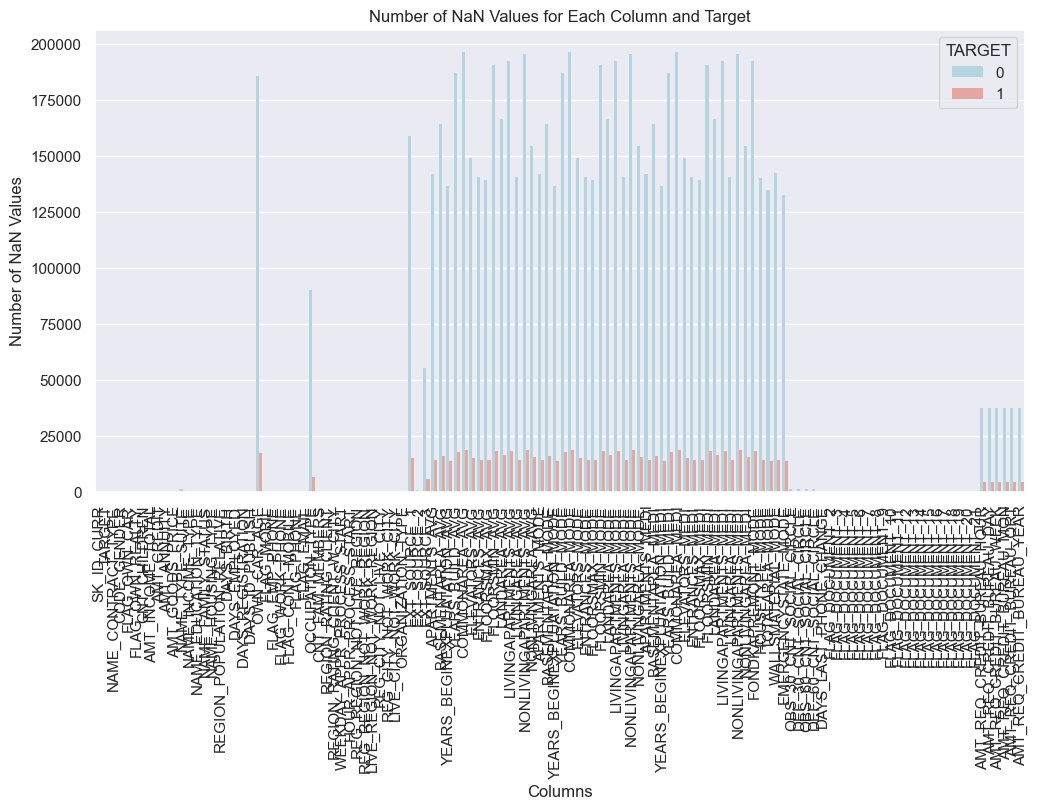

In [412]:
# Create a DataFrame to store the NaN counts for each target value
nan_counts = pd.DataFrame(columns=['Column', 'Target', 'NaN_Count'])

# Iterate over each column
for col in df.columns:
    # Count the number of NaN values for target 0
    nan_count_0 = df.loc[df['TARGET'] == 0, col].isnull().sum()
    
    # Count the number of NaN values for target 1
    nan_count_1 = df.loc[df['TARGET'] == 1, col].isnull().sum()
    
    # Append the NaN counts to the DataFrame
    nan_counts = nan_counts.append({'Column': col, 'Target': 0, 'NaN_Count': nan_count_0}, ignore_index=True)
    nan_counts = nan_counts.append({'Column': col, 'Target': 1, 'NaN_Count': nan_count_1}, ignore_index=True)

# Create a bar plot to visualize the NaN counts for each column and target
plt.figure(figsize=(12, 6))
sns.barplot(x='Column', y='NaN_Count', hue='Target', data=nan_counts, palette=custom_palette, edgecolor='none')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.title('Number of NaN Values for Each Column and Target')
plt.legend(title='TARGET', loc='upper right')
plt.show()

In [413]:
df[['COMMONAREA_MEDI', 'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MEDI', 'TARGET']].tail(10)

,COMMONAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,FLOORSMAX_MEDI,TARGET
307501,NaN,0.0000,block of flats,0.0417,0
307502,NaN,NaN,NaN,NaN,0
307503,NaN,NaN,NaN,NaN,0
307504,NaN,NaN,NaN,NaN,0
307505,0.1441,0.0085,block of flats,0.3333,0
307506,0.0203,0.1118,block of flats,0.6042,0
307507,0.0022,0.0000,block of flats,0.0833,0
307508,0.0124,0.0000,block of flats,0.1667,0
307509,NaN,NaN,block of flats,0.0417,1
307510,0.0177,0.0000,block of flats,0.3750,0


Diketahui bahwa kolom-kolom yang memiliki *missing value* tersebut memiliki rasio perbandingan dengan `target yang tidak begitu signifikan `(tidak ada satu kolom yang benar-benar kehilangan data pada suatu target tertentu, dan sebaliknya). 

Sementara itu, diketahui bahwa beberapa kolom ang berhubungan seperti kolom 'COMMON_MEDI', 'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE, 'FLOORSMAX_MEDI', dan lainnya memiliki hubungan dengan `area dan tipe rumah klien`. Hal ini menjadi kolom yang menarik, dimana mungkin kolom-kolom ini memiliki pola Missing Not at Random (MNAR), dimana diketahui bahwa kolom yang memang tidak memiliki informasi pada satu kolom (dalam hal ini mengenai informasi aset rumah), mungkin juga tidak memiliki informasi pada kolom yang bersekutu. 

**Dropping Column**

In [50]:
#mengambil sampel data yang memiliki nilai nan 
nan_rows = df[df.isnull().any(axis=1)]
nan_rows.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Kami akan melakukan `drop column` untuk semua kolom yang memiliki missing di atas 40% karena kolom-kolom tersebut memiliki yang jumlah missing yang begitu banyak. Kami akan menyingkirkan dengan pertimbangan agar tidak menimbulkan kesalahan asumsi (bila diimputasi dengan nilai lain) serta agar tidak mengurangi banyak kolom (apabila kami memutuskan untuk menyingkirkan baris dibandingkan kolom). Selain itu, terlihat juga bahwa kolom-kolom tersebut merupakan kolom yang berhubungan dengan informasi rumah. Maka dari itu, mungkin memang ada pola dimana informasi ini bukanlah informasi yang dilengkapi oleh klien pada portfolio kreditnya (optional/ data masih menyusul).


In [10]:
# membuat list missing value
missing_v = list(missing_values[missing_values['Percentage'] > 40].index)

df_drop = df.copy()
# drop ID name
df_drop = df_drop.drop(columns = 'SK_ID_CURR')
# drop missing value 
df_drop = df_drop.drop(columns = missing_v)

In [11]:
df_drop.shape

(307511, 72)

Kolom kini tersisa 80 kolom.

Dari tabel tersebut kita telah mengetahui bahwa ada beberapa *missing value* yang ditandai dengan judul berbeda-beda. Diantaranya adalah:
- 'XNA': Missing value pada kolom 'CODE_GENDER' dan 'ORGANIZATION_TYPE'
- 'nan': Missing value pada seluruh kolom lainnya

In [12]:
df_drop['CODE_GENDER'] = df_drop['CODE_GENDER'].replace(['XNA'], df_drop['CODE_GENDER'].mode()[0])
df_drop['ORGANIZATION_TYPE'] = df_drop['ORGANIZATION_TYPE'].replace(['XNA'], df_drop['ORGANIZATION_TYPE'].mode()[0])

df_drop_ori = df_drop.copy()

# mengganti missing value dengan 0
df_drop.fillna(0, inplace=True)
df_drop.replace('<NA>', 0, inplace=True)

### Split Numerical Categorical

In [13]:
# mendefinisikan kolom kategorikal 
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
# mendefinisikan kolom kategorikal yang dibersihkan dari kolom dengan missing value 
cat_cols_drop = [col for col in cat_cols if col not in missing_v]
# mendefinisikan kolom kategorikal yang belum di encode
unencoded = ['ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START','OCCUPATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','NAME_TYPE_SUITE','FLAG_OWN_REALTY','FLAG_OWN_CAR','CODE_GENDER']



# mendefinisikan kolom numerikal
num_cols = df.drop(cat_cols, axis=1).columns.tolist()
num_cols.remove('TARGET')
num_cols.remove('SK_ID_CURR')
# mendefinisikan kolom numerikal yang dibersihkan dari kolom dengan missing value
num_cols_drop = [col for col in num_cols if col not in missing_v]

### Categorical

In [88]:
# karena data kategorikal sudah dilakukan encoding dari dataset asli, perlu dilakukan pembuatan tabel describe secara manual
# membuat dataframe kosong
description_cat = pd.DataFrame(columns=['Column', 'Unique Values', 'Count Unique', 'Top Value'])

# iterasi masing-masing kolom terhadap rumus count, top, dll
for column in cat_cols:
    unique_values = df[column].unique()
    count = df[column].nunique()
    top_value = df[column].value_counts().idxmax()
    description_cat = description_cat.append({'Column': column, 'Unique Values': unique_values, 'Count Unique': count, 'Top Value': top_value}, ignore_index=True)

# show
description_cat

,Column,Unique Values,Count Unique,Top Value
0,NAME_CONTRACT_TYPE,"[Cash loans, Revolving loans]",2,Cash loans
1,CODE_GENDER,"[M, F, XNA]",3,F
2,FLAG_OWN_CAR,"[N, Y]",2,N
3,FLAG_OWN_REALTY,"[Y, N]",2,Y
4,CNT_CHILDREN,"[0, 1, 2, 3, 4, 7, 5, 6, 8, 9, 11, 12, 10, 19,...",15,0
5,NAME_TYPE_SUITE,"[Unaccompanied, Family, Spouse, partner, Child...",7,Unaccompanied
6,NAME_INCOME_TYPE,"[Working, State servant, Commercial associate,...",8,Working
7,NAME_EDUCATION_TYPE,"[Secondary / secondary special, Higher educati...",5,Secondary / secondary special
8,NAME_FAMILY_STATUS,"[Single / not married, Married, Civil marriage...",6,Married
9,NAME_HOUSING_TYPE,"[House / apartment, Rented apartment, With par...",6,House / apartment


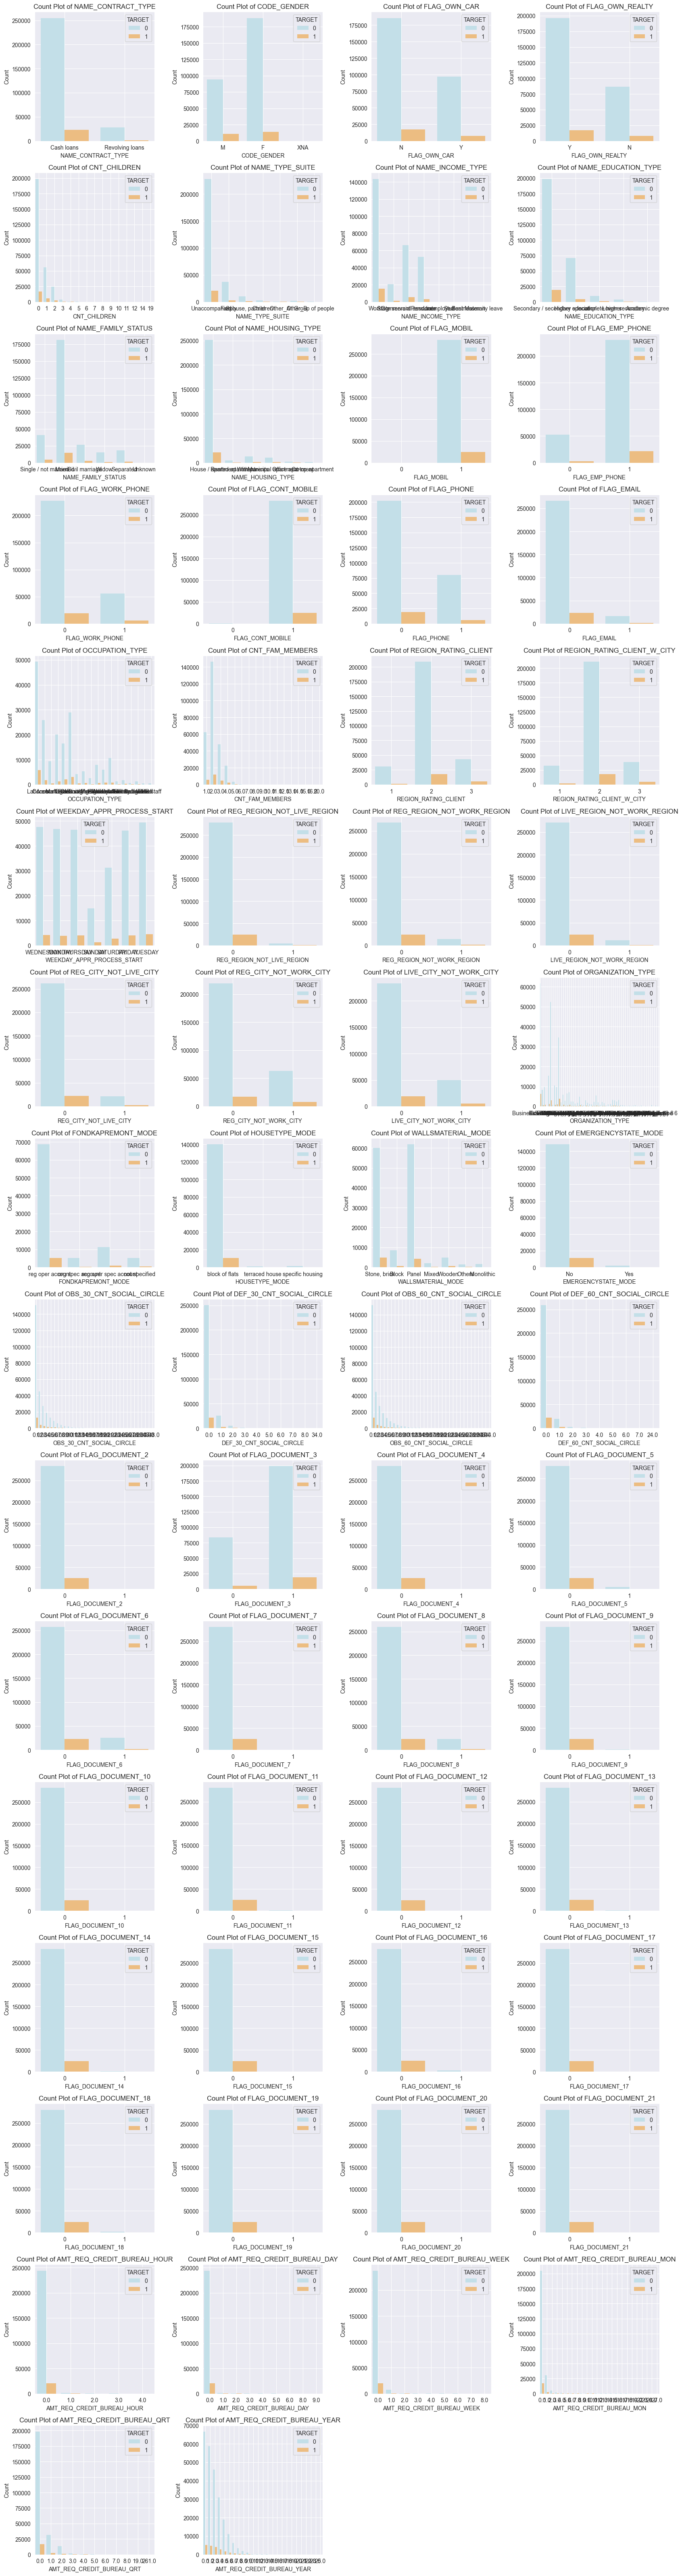

In [113]:
# Calculate the number of rows and columns needed based on the total number of columns
total_cols = len(cat_cols)
rows = (total_cols + 3) // 4
cols = 4

# Membuat canvas
fig, axes = plt.subplots(rows, cols, figsize=(17, 4 * rows))

# Loop through cat_cols
for i, column in enumerate(cat_cols):
    row = i // cols  # Nomor baris subplot
    col = i % cols   # Nomor kolom subplot

    # show count plot
    ax = sns.countplot(x=column, data=df, hue='TARGET', palette='RdYlBu_r', ax=axes[row, col], edgecolor='none')
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels())
    ax.grid(True, color='white')  # grid untuk memudahkan visualisasi

# Hide the empty subplots
if total_cols % cols != 0:
    for j in range(total_cols % cols, cols):
        axes[rows-1, j].axis('off')

# show plot
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()


Beberapa hal menarik yang dapat diambil dari plot tersebut adalah: 
- 'NAME_CONTRACT_TYPE': Mayoritas debitur meminjam `cash`.
- 'CODE_GENDER': Kebanyakan debitur merupakan wanita. Namun jika dilihat dari rasionya, `lelaki` memiliki rasio kemungkinan *default* yang `lebih tinggi`.
- 'CNT_CHILDREN': Kebanyakan debitur tidak memiliki anak. Terlepas dari itu, `tidak ada perbedaan rasio` yang signifikan antara debitur yang melunasi pembayaran dan yang gagal membayar. 
- 'NAME_FAMILY_STATUS': Kebanyakan debitur telah menikah.
- Mayoritas debitur bekerja serta memiliki tingkat edukasi *secondary*. 
- Mayoritas debitur yang memiliki aset rumah lebih memiliki kecenderungan untuk gagal bayar dibandingkan debitur yang memiliki mobil. Hal ini mungkin dikarenakan debitur tersebut memiliki beban lainnya (cicilan rumah, biaya perawatan, dan lain-lain) sehingga kepemilikan aset bukan berarti menandakan orang tersebut selalu "lebih mampu"--melainkan menandakan lebih banyak beban yang harus mereka tanggung. 
- Kebanyakan debitur mengambil kredit untuk rumah tipe apartment. Hal ini mungkin dapat menggambarkan kondisi sosial maupun ekonomi dari debitur (mungkin masih single atau memiliki keluarga kecil, dan sebagainya) 
- Untuk kolom lainnya, diasumsikan terlihat tidak ada hubungan yang signifikan dengan target. 

### Numerical

Bagian ini akan fokus dalam melihat korelasi fitur numerikal dengan target. Di luar dari itu, akan dilakukan juga beberapa pengelompokkan dan visualisasi untuk melihat keterhubungan dan keunikan data. 

In [108]:
# melihat deskripsi data
df[num_cols].describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,307510.000000
mean,278180.518577,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,12.063419,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,-962.858788
std,102790.175348,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,3.265832,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,826.808487
min,100002.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,189145.500000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,10.000000,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.976700,0.687200,0.007800,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.000000,0.052500,0.040700,0.976700,0.699400,0.007200,0.000000,0.069000,0.166700,0.083300,0.016600,0.054200,0.042700,0.000000,0.000000,0.05

Diketahui bahwa kolom 'DAYS..." memiliki `nilai negatif`. Hal ini mungkin dikarenakan kolom tersebut merupakan `perhitungan mundur` dari hari terakhir nasabah melakukan pembaharuan data tersebut (seperti hari saat pendaftaran, hari kelahiran, dan sebagainya). Oleh karena itu, nilai negatif ini kami anggap sebagai hal yang wajar (data apa adanya) dan tidak kami ubah menjadi positif. 

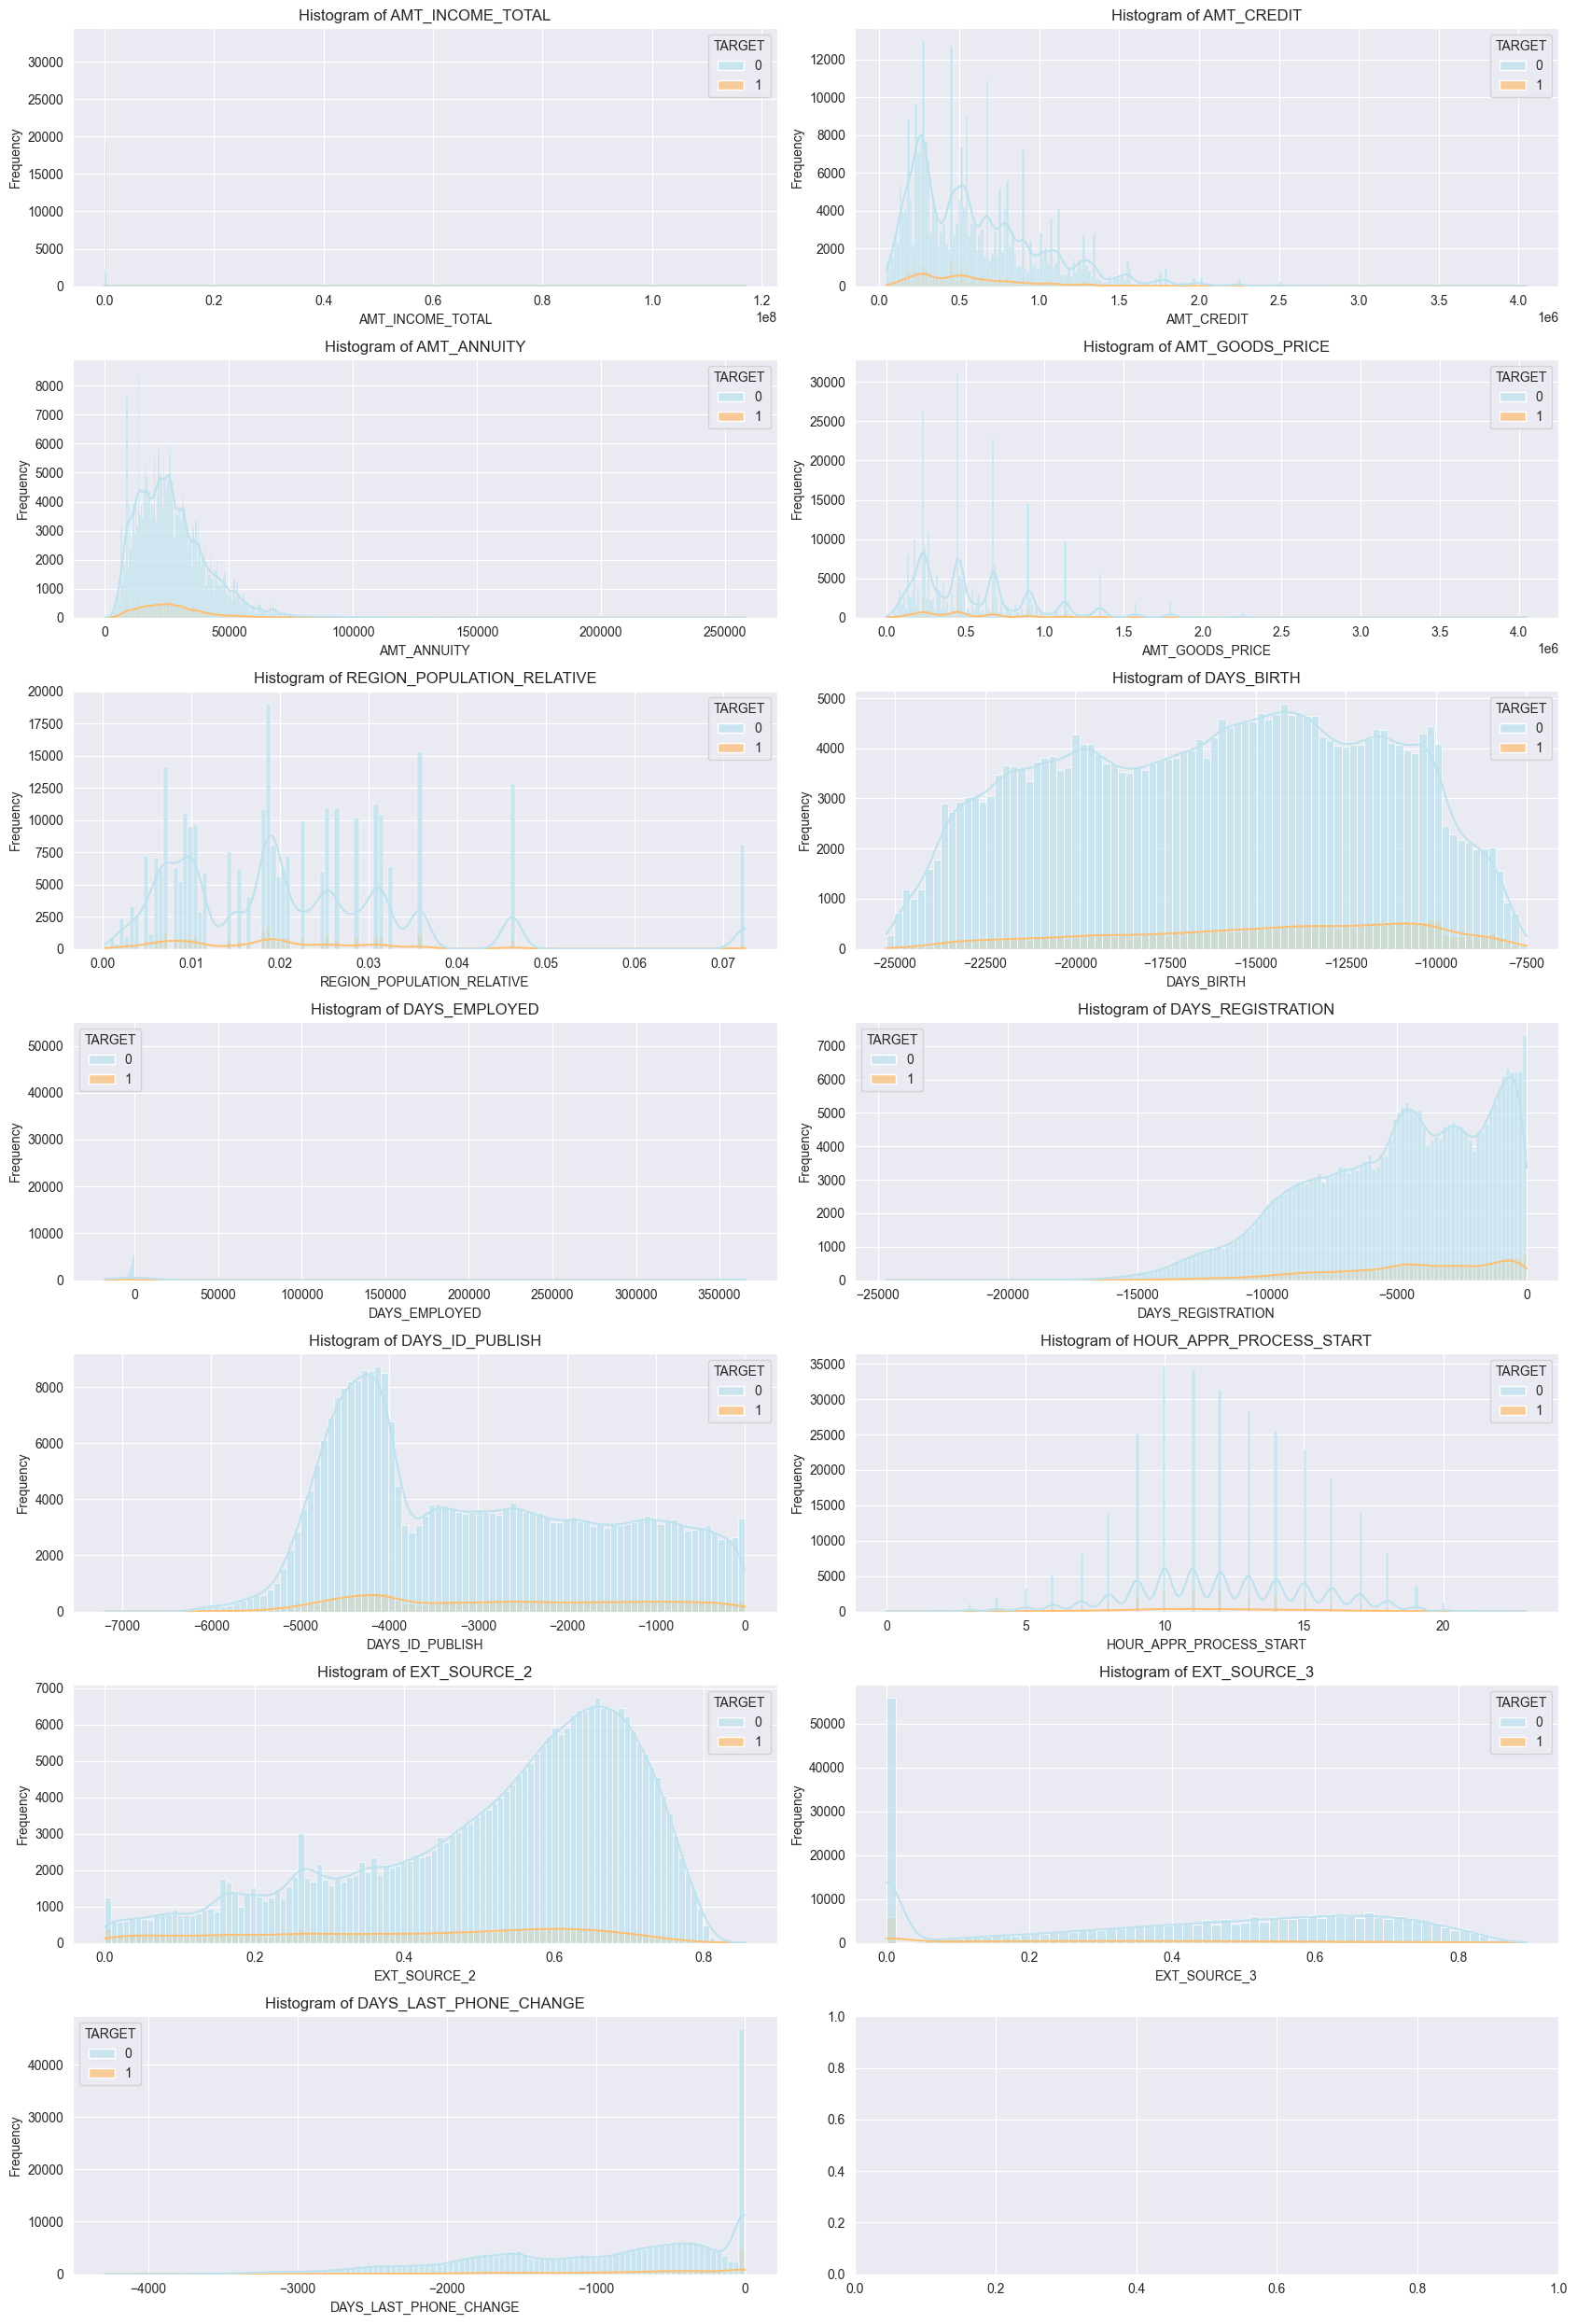

In [182]:
# Membuat canvas
fig, axes = plt.subplots(7, 2, figsize=(17, 25))

# Looping histogram
for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols_drop):
        # Membuat histogram dengan hue
        sns.histplot(data=df_drop, x=num_cols_drop[i], palette='RdYlBu_r', hue='TARGET', alpha=0.7, ax=ax, kde=True)
        ax.set_title(f'Histogram of {num_cols_drop[i]}')
        ax.set_xlabel(num_cols_drop[i])
        ax.set_ylabel('Frequency')
        ax.grid(True, color='white')  # Grid untuk memudahkan visualisasi

# Show plot
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

In [185]:
df_drop[num_cols_drop].apply(lambda x: round(x.skew(), 3))

AMT_INCOME_TOTAL              391.560
AMT_CREDIT                      1.235
AMT_ANNUITY                     1.579
AMT_GOODS_PRICE                 1.347
REGION_POPULATION_RELATIVE      1.488
DAYS_BIRTH                     -0.116
DAYS_EMPLOYED                   1.664
DAYS_REGISTRATION              -0.591
DAYS_ID_PUBLISH                 0.349
HOUR_APPR_PROCESS_START        -0.028
EXT_SOURCE_2                   -0.800
EXT_SOURCE_3                   -0.309
DAYS_LAST_PHONE_CHANGE         -0.714
dtype: float64

Beberapa hal menarik yang dapat diambil dari plot tersebut adalah: 
- 'AMT_INCOME_TOTAL': Memiliki persebaran right skewed yang sangat ekstrim.
- 'AMT_CREDIT': Kebanyakan debitur memiliki jumlah kredit yang rendah. 
- 'AMT_ANNUITY': Diketahui bahwa debitur yang memiliki anuitas tinggi maupun tidak, memiliki kecenderungan untuk gagal bayar yang kurang lebih sama (jika dilihat dari rasionya).  
- 'REGION_POPULATION_RELATIVE': Kebanyakan debitur memiliki populasi region 0.02 yang menandakan daerah yang kepadatan penduduknya sedang. 
- 'DAYS_BIRTH': Kebanyakan debitur berumur 15,000 hari atau sekitar 37-42 tahun saat mulai berlangganan. Ada hal menarik, dimana debitur yang lebih `muda` (berumur sekitar 27 taun atau 10,000 hari) memiliki tendensi untuk `gagal bayar`. Hal ini menjadi hal yang penting untuk diteliti jika ada hal lain yang berkaitan (seperti pendapatan, pekerjaan) dengan kelompok tersebut. 
- 'EXT_SOURCE_2': Kebanyakan debitur memiliki skor kredit sekitar 0.7 berdasarkan sumber eksternal 2. Sementara itu, terlihat bahwa grafik menunjukkan jumlah kreditur yang semakin sedikit untuk debitur yang memiliki skor rendah--sementara jumlah debitur yang gagal bayar kurang lebih tetap (flat) untuk setiap skor. Hal ini menandakan bahwa  debitur yang memiliki skor kredit lebih rendah cendeung untuk gagal bayar. 
- 'EXT_SOURCE_3': Pada kolom ini ditandai ada banyak debitur yang memiliki skor 0.0. Hal ini dapat ditandai karena kesalahan pemasukan data, atau mungkin memang merupakan data apa adanya. 
- Sementara untuk kolom lainnya, diasumsikan belum ada hubungan yang terlihat signifikan dengan target jika dilihat dari histogram. 

### Outlier

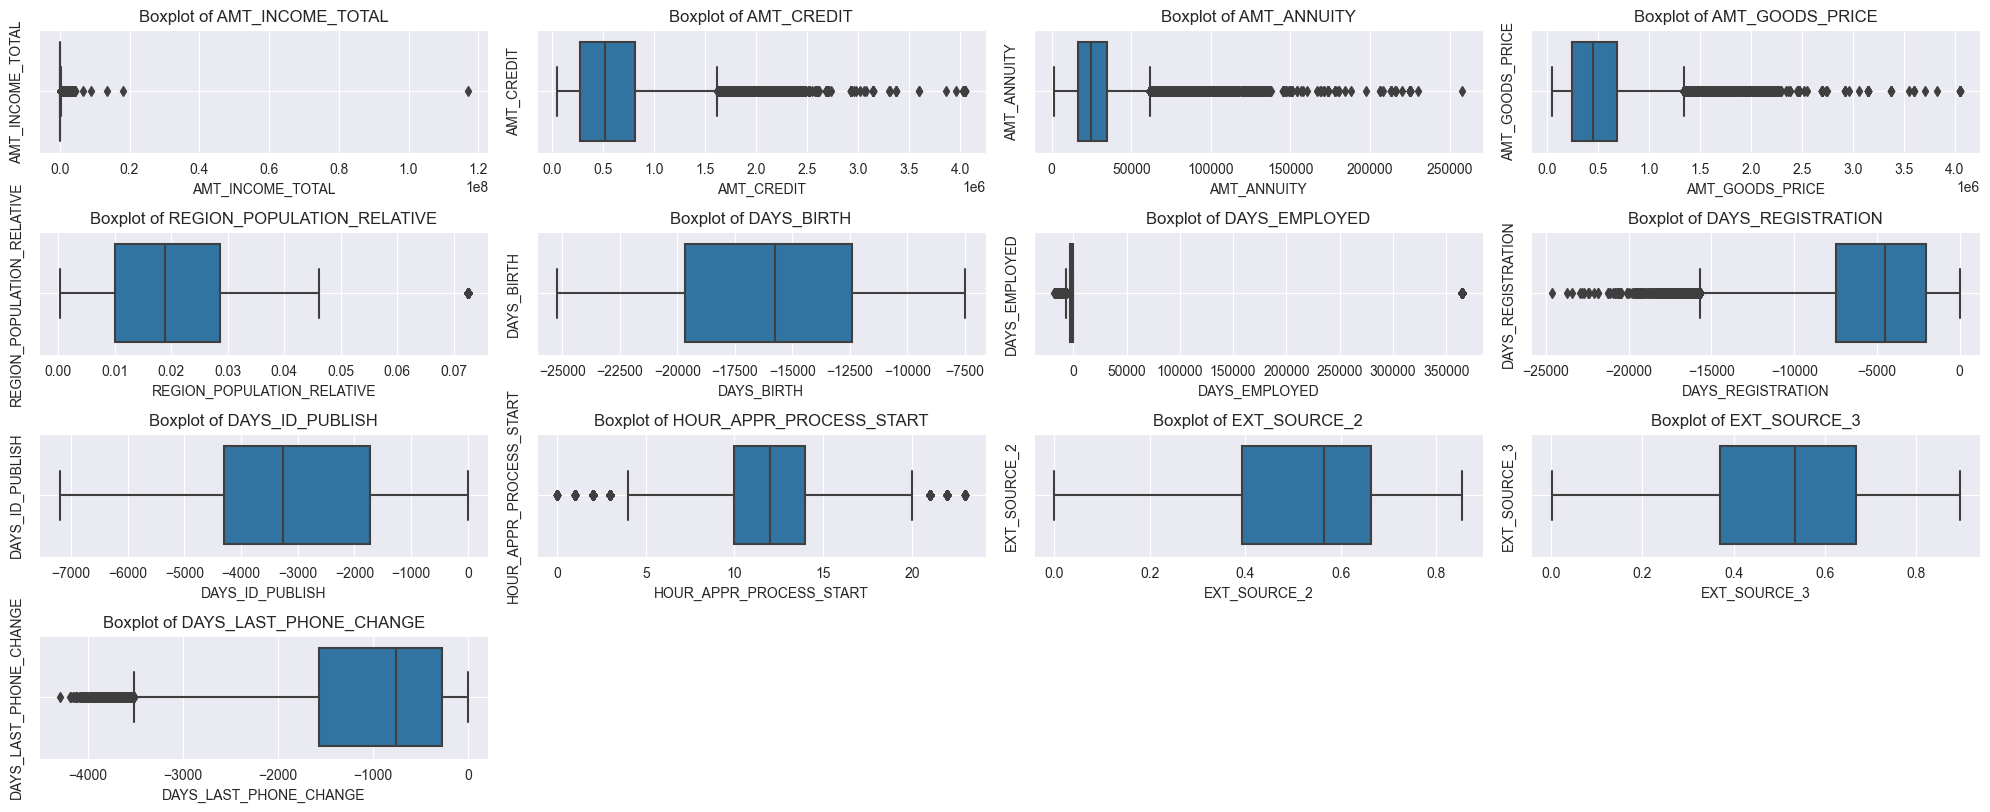

In [336]:
# membuat canvas
sns.set_style("darkgrid")
fig, axes = plt.subplots(15, 4, figsize=(20, 30))

# membuat box plot untuk melihat outlier pada data numerikal
for i, col in enumerate(num_cols_drop):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)
    ax.grid(True)  # Add a grid to the plot

# hapus plot berlebih 
if len(num_cols_drop) < 60:
    for j in range(len(num_cols_drop), 60):
        fig.delaxes(axes[j // 4, j % 4])

plt.tight_layout()
plt.show()

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='AMT_GOODS_PRICE'>

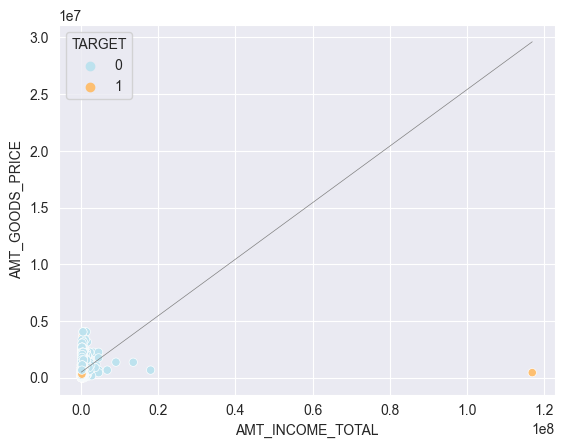

In [190]:
# scatter plot 
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_GOODS_PRICE', data=df_drop, hue='TARGET', palette='RdYlBu_r')
sns.regplot(x='AMT_INCOME_TOTAL', y='AMT_GOODS_PRICE', data=df_drop, scatter=False, color='grey', ci=None, line_kws={'linewidth': 0.5})

Terlihat ada outlier pada beberapa kolom numerikal yang menyebabkan persebaran data menjadi kurang baik. Akan dilakukan handling outlier pada bagian pre-processing model yang sesuai dengan jenis data. 

### Target Relation

**Target Ratio**

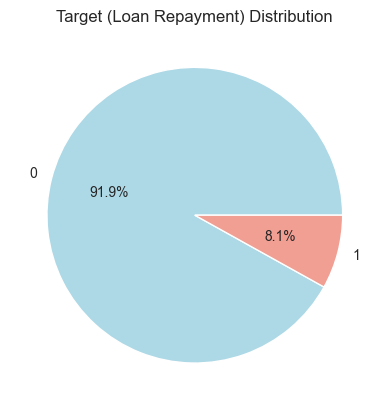

In [107]:
# memvisualisasikan rasio target 
target_counts = df['TARGET'].value_counts() # count

# membuat pie chard
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=custom_palette)
plt.title('Target (Loan Repayment) Distribution')
plt.show()

Diketahui bahwa Home Credit saat ini memiliki 8.1% klien yang gagal bayar. Hal ini menunjukan perbandingan data yang tidak seimbang (8:2) dan dapat menurunkan performa model jika menggunakan perbandingan jumlah target seperti ini.

**Credit and Goods Price**

In [316]:
df.groupby(['TARGET'])[['AMT_CREDIT']].mean()


,AMT_CREDIT
TARGET,
0,602648.282002
1,557778.527674


In [317]:
df.groupby(['TARGET'])[['AMT_GOODS_PRICE']].mean()

,AMT_GOODS_PRICE
TARGET,
0,542736.795003
1,488972.412554


Debitur yang terindikasi gagal bayar cenderung memiliki pembelian serta jumlah kredit yang diberikan lebih rendah dibandingkan debitur yang melalukan pembayaran. 

**Age Group**

In [325]:
# membuat kolom baru yang membagi hari ke dalam tahun (mencari umur debitur)
df_age = df.copy()
df_age['AGE'] = df_age['DAYS_BIRTH'] // 365 *-1
age_ranges = [(0, 30), (30, 35), (35, 40), (40,45), (45,50), (50,60), (60, 100)] # mendefinisikan range umur
max_age = df_age['AGE'].max()

# membuat tabel baru berisi kategorikal age group 
df_age['AGE_GROUP'] = pd.cut(df_age['AGE'], bins=[start for start, _ in age_ranges] + [max_age], right=False, labels=['{}-{}'.format(start, end) for start, end in age_ranges])

In [327]:
df_age.groupby(['TARGET', 'AGE_GROUP'])[['AMT_GOODS_PRICE']].mean()

AMT_GOODS_PRICE
TARGET AGE_GROUP                 
0      0-30         429930.739087
       30-35        508899.963554
       35-40        561570.055357
       40-45        584898.094216
       45-50        602664.517505
       50-60        587482.906464
       60-100       485343.938380
1      0-30         394669.626544
       30-35        456211.845098
       35-40        493539.579158
       40-45        524780.257426
       45-50        535292.313975
       50-60        545545.111579
       60-100       505028.424542

Diketahui bahwa debitur yang cenderung gagal bayar memiliki total harga barang belanjaan yang cenderung `lebih rendah` bila dibandingkan sesuai dengan kelompok umurnya. 

**Credit Score**

In [329]:
df_age.groupby(['TARGET', 'AGE_GROUP'])[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean()

EXT_SOURCE_2  EXT_SOURCE_3
TARGET AGE_GROUP                            
0      0-30           0.465136      0.431014
       30-35          0.509343      0.487990
       35-40          0.527491      0.510229
       40-45          0.539852      0.525484
       45-50          0.545146      0.534969
       50-60          0.539751      0.543007
       60-100         0.520304      0.574662
1      0-30           0.360692      0.324747
       30-35          0.395395      0.376272
       35-40          0.407568      0.387953
       40-45          0.431054      0.399161
       45-50          0.437856      0.409892
       50-60          0.441469      0.411341
       60-100         0.420942      0.466543

# V. Feature Engineering

### Split Train Test

In [46]:
# split Fitur dan target
X_o = df_drop_ori.drop('TARGET', axis=1)
y_o = df_drop_ori['TARGET']

In [49]:
# Membagi data test dan train
from sklearn.model_selection import train_test_split

X_train_o,X_test_o, y_train_o, y_test_o= train_test_split(X_o,y_o, test_size=0.3, 
                                                  random_state=66, stratify = y_o)
print(f'train size: {X_train_o.shape}')
print(f'test size: {X_test_o.shape}')

# reset index
X_train_o.reset_index(drop=True, inplace=True)
X_test_o.reset_index(drop=True, inplace=True)
y_train_o.reset_index(drop=True, inplace=True)
y_test_o.reset_index(drop=True, inplace=True)

train size: (215257, 71)
test size: (92254, 71)


### Split Numerical and Categorical Column

In [50]:
# melihat bentuk penyebaran data numerikal
X_train_o[num_cols_drop].apply(lambda x: round(x.skew(), 3))

AMT_INCOME_TOTAL              360.976
AMT_CREDIT                      1.233
AMT_ANNUITY                     1.555
AMT_GOODS_PRICE                 1.346
REGION_POPULATION_RELATIVE      1.485
DAYS_BIRTH                     -0.114
DAYS_EMPLOYED                   1.664
DAYS_REGISTRATION              -0.595
DAYS_ID_PUBLISH                 0.351
HOUR_APPR_PROCESS_START        -0.028
EXT_SOURCE_2                   -0.795
EXT_SOURCE_3                   -0.404
DAYS_LAST_PHONE_CHANGE         -0.716
dtype: float64

In [51]:
num_skewed = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

num_normal = ['DAYS_BIRTH', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

Selanjutnya juga akan dilakukan split kolom kategorikal dan numerikal. 

In [53]:
# split test dan train untuk berdasarkan masing-masing pembagian data numerikal dan kategorikal

X_train_norm_o = X_train_o[num_normal]
X_test_norm_o = X_train_o[num_normal]

X_train_skewed_o = X_test_o[num_skewed]
X_test_skewed_o = X_test_o[num_skewed]

X_train_cat_o = X_train_o.drop(num_cols_drop, axis=1)
X_test_cat_o = X_test_o.drop(num_cols_drop, axis=1)

X_train_cat_o.head(2)


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,N,1,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,Medicine staff,3.0,3,3,TUESDAY,0,0,0,1,0,0,Industry: type 3,3.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
1,Cash loans,M,Y,Y,0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,1,1,0,1,1,0,Managers,2.0,3,3,SATURDAY,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Impute Missing Value

Sebelumnya pada bagian EDA kami telah melakuakn drop kolom pada kolom yang memiliki missing value lebih dari 40%. Untuk kolom sisanya akan dilakukan impute missing value sesuai dengan strategi tipe kolom: median untuk kolom numerikal skewed, mean untuk kolom numerikal yang terdistribusi dengan normal, dan modus untuk kolom kategorikal. Sementara itu untuk baris lainnya yang mungkin tidak terjangkau oleh imputer akan dilakukan drop baris karena dianggap sudah berjumlah sedikit. 

In [123]:
mean_imp = SimpleImputer(strategy='mean')
median_imp = SimpleImputer(strategy='median')
modus_imp = SimpleImputer(strategy='most_frequent')

# fit each
X_train_norm_o = mean_imp.fit_transform(X_train_o[num_normal])
X_train_skewed_o = median_imp.fit_transform(X_train_o[num_skewed])
X_train_cat_o = modus_imp.fit_transform(X_train_o[cat_cols_drop])

X_train_norm_o = pd.DataFrame(X_train_norm_o, columns=num_normal)
X_train_skewed_o = pd.DataFrame(X_train_skewed_o, columns=num_skewed)
X_train_cat_o = pd.DataFrame(X_train_cat_o, columns=cat_cols_drop)
X_train_cat_o.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,N,1,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,Medicine staff,3.0,3,3,TUESDAY,0,0,0,1,0,0,Industry: type 3,3.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
1,Cash loans,M,Y,Y,0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,1,1,0,1,1,0,Managers,2.0,3,3,SATURDAY,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cash loans,F,N,N,1,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,1,1,1,1,0,0,Accountants,3.0,2,2,MONDAY,0,0,0,0,0,0,Business Entity Type 2,6.0,0.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,Revolving loans,F,N,Y,0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,Core staff,2.0,2,2,TUESDAY,0,0,0,0,0,0,Business Entity Type 2,5.0,0.0,5.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
4,Cash loans,F,N,Y,1,Unaccompanied,Working,Higher education,Married,House / apartment,1,1,0,1,0,0,Managers,3.0,2,2,SATURDAY,0,0,0,0,0,0,Business Entity Type 2,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [119]:
# fit each
X_test_norm_o = mean_imp.fit_transform(X_test_o[num_normal])
X_test_skewed_o = median_imp.fit_transform(X_test_o[num_skewed])
X_test_cat_o = modus_imp.fit_transform(X_test_o[cat_cols_drop])

X_test_norm_o = pd.DataFrame(X_test_norm_o, columns=num_normal)
X_test_skewed_o = pd.DataFrame(X_test_skewed_o, columns=num_skewed)
X_test_cat_o = pd.DataFrame(X_test_cat_o, columns=cat_cols_drop)
X_test_cat_o.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,F,Y,Y,0,Family,Working,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,Sales staff,2.0,2,2,FRIDAY,0,0,0,0,0,0,Self-employed,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
1,Cash loans,F,N,Y,0,Family,Pensioner,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,1,0,Laborers,1.0,2,2,SATURDAY,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,Cash loans,F,N,Y,0,Unaccompanied,State servant,Higher education,Married,House / apartment,1,1,0,1,0,0,Core staff,2.0,2,2,TUESDAY,0,0,0,0,0,0,Kindergarten,6.0,0.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,Y,Y,0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,0,0,0,0,0,0,Business Entity Type 3,11.0,3.0,11.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,Revolving loans,F,N,Y,0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,Private service staff,2.0,2,2,TUESDAY,1,1,0,0,0,0,Services,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### Encode

In [77]:
ohe_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',	'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

Akan dilakukan one hot encoding untuk kolom yang belum di encode. 

In [93]:
# kolom sebelum di-encode
X_train_cat_o.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,N,1,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,Medicine staff,3.0,3,3,TUESDAY,0,0,0,1,0,0,Industry: type 3,3.0,0.0,3.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
1,Cash loans,M,Y,Y,0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,1,1,0,1,1,0,Managers,2.0,3,3,SATURDAY,0,0,0,0,1,1,Business Entity Type 3,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cash loans,F,N,N,1,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,1,1,1,1,0,0,Accountants,3.0,2,2,MONDAY,0,0,0,0,0,0,Business Entity Type 2,6.0,0.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,Revolving loans,F,N,Y,0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,Core staff,2.0,2,2,TUESDAY,0,0,0,0,0,0,Business Entity Type 2,5.0,0.0,5.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
4,Cash loans,F,N,Y,1,Unaccompanied,Working,Higher education,Married,House / apartment,1,1,0,1,0,0,Managers,3.0,2,2,SATURDAY,0,0,0,0,0,0,Business Entity Type 2,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [124]:
#memasukan encoder pada variabel
enc_ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

#fit dan transform pada train dan test
X_train_cat_o = enc_ohe.fit_transform(X_train_cat_o[ohe_cols])
X_test_cat_o = enc_ohe.transform(X_test_cat_o[ohe_cols])

In [126]:
# proses pembuatan kolom baru dengan get features name
feature_names = enc_ohe.get_feature_names_out(input_features= ohe_cols)

#membuat data frame
X_train_cat_o = pd.DataFrame(X_train_cat_o, columns=feature_names)
X_test_cat_o = pd.DataFrame(X_test_cat_o, columns=feature_names)

X_test_cat_o.head(3)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_3,CNT_CHILDREN_4,CNT_CHILDREN_5,CNT_CHILDREN_6,CNT_CHILDREN_7,CNT_CHILDREN_8,CNT_CHILDREN_9,CNT_CHILDREN_10,CNT_CHILDREN_11,CNT_CHILDREN_12,CNT_CHILDREN_14,CNT_CHILDREN_19,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,1.0,0.0,1.0,0.0,0.0,1.0,0

In [337]:
# melihat ukuran setelah di-encode
X_test_cat_o.shape

(92254, 137)

### Feature Selection

Akan dilakukan beberapa teknik untuk pemilihan fitur. Karena data asli sudah ditransformasikan ke dalam bentuk angka, maka dapat dilakukan uji korelasi Pearson. Kami juga akan melakukan pemilihan fitur dengan Chi-square dan ANOVA.

**ANOVA**

In [378]:
# melakukan pemilihan ANOVA untuk data kategorikal
selector = SelectKBest(score_func=f_classif, k=4) 

selector.fit(X_train, y_train)
df_scores = pd.DataFrame({'Cat Feature': X_train.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# mengurutkan data
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores[df_scores['p-value'] < 0.05]

,Cat Feature,Score,p-value
26,EXT_SOURCE_2,5426.434689,0.0000
27,EXT_SOURCE_3,3099.947438,0.0000
6,DAYS_BIRTH,1305.804374,0.0000
18,REGION_RATING_CLIENT_W_CITY,783.503770,0.0000
17,REGION_RATING_CLIENT,740.167097,0.0000
89,NAME_INCOME_TYPE_Working,739.699642,0.0000
91,NAME_EDUCATION_TYPE_Higher education,680.857024,0.0000
39,DAYS_LAST_PHONE_CHANGE,666.575931,0.0000
68,CODE_GENDER_F,634.798928,0.0000
69,CODE_GENDER_M,634.798928,0.0000


Diketahui bahwa semua kolom di atas memiliki hubungan dari target. Hal tersebut terlihat dari p-value yang kurang dari 0.05. Sementara itu, score yang besar akan menandakan keterhubungan yang lebih besar juga; ditandai dengan kolom 'EXT_SOURCE_2' yang memiliki value score tertinggi. 

**Chi-Square**

In [386]:
# melakukan chi-square terhadap target
chi_scores = []
for column in cat_cols_enc:
    contingency_table = pd.crosstab(X_train[column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_scores.append((column, p))

# sort berdasarkan p-value
chi_scores.sort(key=lambda x: x[1]) #<0.05 berkorelasi

# print
for chi in chi_scores:
    print(f"Feature: {chi[0]}, p-value: {chi[1]}")

Feature: REGION_RATING_CLIENT_W_CITY, p-value: 9.26715753755703e-171
Feature: NAME_INCOME_TYPE_Working, p-value: 3.0610889871306797e-162
Feature: REGION_RATING_CLIENT, p-value: 5.685869311470857e-161
Feature: NAME_EDUCATION_TYPE_Higher education, p-value: 1.6161926100903159e-149
Feature: CODE_GENDER_F, p-value: 1.4158803043392208e-139
Feature: CODE_GENDER_M, p-value: 1.4158803043392208e-139
Feature: REG_CITY_NOT_WORK_CITY, p-value: 7.135759417802166e-118
Feature: NAME_EDUCATION_TYPE_Secondary / secondary special, p-value: 1.7566374242821696e-113
Feature: NAME_INCOME_TYPE_Pensioner, p-value: 9.459670518450542e-102
Feature: FLAG_EMP_PHONE, p-value: 1.1135115443864219e-100
Feature: FLAG_DOCUMENT_3, p-value: 3.2546747417240056e-95
Feature: OCCUPATION_TYPE_Laborers, p-value: 8.754270637877889e-92
Feature: EMERGENCYSTATE_MODE_No, p-value: 1.5864021028763122e-85
Feature: REG_CITY_NOT_LIVE_CITY, p-value: 3.3023271563621396e-85
Feature: EMERGENCYSTATE_MODE_0, p-value: 2.434434087413092e-80
Feat

Diketahui bahwa menurut uji Chi-square, 'REGION_RATING_CLIENT_W_CITY' memiliki ketergantungan yang signifikan terhadap target. 

**Random Forest's Feature Importances**

Melihat important features berdasarkan pemilihan model Random Forest karena salah satu model yang akan dibuat adalah Random Forest.

In [370]:
# definisi model
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(X_train, y_train)

# sort berdasarkan kepentingan
importances = rf_class.feature_importances_
sorted_rf = np.argsort(rf_class.feature_importances_)[::-1]

# Print the feature importances
for i in sorted_rf:
    print(f'Feature: {X_train.columns[i]}, Importance: {importances[i]}')

Feature: EXT_SOURCE_2, Importance: 0.05854733975563573
Feature: EXT_SOURCE_3, Importance: 0.04533394151735954
Feature: DAYS_BIRTH, Importance: 0.04270474867633066
Feature: DAYS_ID_PUBLISH, Importance: 0.041620022804843504
Feature: DAYS_REGISTRATION, Importance: 0.0411501016239804
Feature: AMT_ANNUITY, Importance: 0.038226692001906704
Feature: DAYS_LAST_PHONE_CHANGE, Importance: 0.037466479333528875
Feature: DAYS_EMPLOYED, Importance: 0.036359099964616025
Feature: AMT_CREDIT, Importance: 0.035731266075323925
Feature: AMT_INCOME_TOTAL, Importance: 0.032176817683461284
Feature: REGION_POPULATION_RELATIVE, Importance: 0.03189600121735509
Feature: AMT_GOODS_PRICE, Importance: 0.031185888421202162
Feature: HOUR_APPR_PROCESS_START, Importance: 0.02886328172523922
Feature: AMT_REQ_CREDIT_BUREAU_YEAR, Importance: 0.020034044421527133
Feature: TOTALAREA_MODE, Importance: 0.018148149363554106
Feature: OBS_30_CNT_SOCIAL_CIRCLE, Importance: 0.0164489026185175
Feature: OBS_60_CNT_SOCIAL_CIRCLE, Impo

Menurut random forest, fitur yang paling penting dikepalai oleh 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'.

### Concat

In [127]:
# reset index data train
X_train_norm_o = X_train_norm_o.reset_index(drop=True)
X_train_skewed_o = X_train_skewed_o.reset_index(drop=True)
X_train_cat_o = X_train_cat_o.reset_index(drop=True)

# menggabungkan ketiga dataframe
X_train_final = pd.concat([X_train_norm_o, X_train_skewed_o, X_train_cat_o], axis=1)

# reset index dataframe terbentuk
X_train_final = X_train_final.reset_index(drop=True)
X_train_final.head()

,DAYS_BIRTH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_3,CNT_CHILDREN_4,CNT_CHILDREN_5,CNT_CHILDREN_6,CNT_CHILDREN_7,CNT_CHILDREN_8,CNT_CHILDREN_9,CNT_CHILDREN_10,CNT_CHILDREN_11,CNT_CHILDREN_12,CNT_CHILDREN_14,CNT_CHILDREN_19,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE

In [128]:
# reset index data test
X_test_norm_o = X_test_norm_o.reset_index(drop=True)
X_test_skewed_o = X_test_skewed_o.reset_index(drop=True)
X_test_cat_o = X_test_cat_o.reset_index(drop=True)

# menggabungkan ketiga dataframe
X_test_final = pd.concat([X_test_norm_o, X_test_skewed_o, X_test_cat_o], axis=1)

# reset index dataframe terbentuk
X_test_final = X_test_final.reset_index(drop=True)
X_test_final.head()

,DAYS_BIRTH,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,CNT_CHILDREN_0,CNT_CHILDREN_1,CNT_CHILDREN_2,CNT_CHILDREN_3,CNT_CHILDREN_4,CNT_CHILDREN_5,CNT_CHILDREN_6,CNT_CHILDREN_7,CNT_CHILDREN_8,CNT_CHILDREN_9,CNT_CHILDREN_10,CNT_CHILDREN_11,CNT_CHILDREN_12,CNT_CHILDREN_14,CNT_CHILDREN_19,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE

# VI. Modelling

Akan dilakukan percobaan dengan lima model. Model tersebut serta deskripsi singkatnya adalah:

1. **Logistic Regression**: Pengklasifikasi linear yang digunakan untuk masalah klasifikasi biner. Kekurangan mdeol ini adalah sensitif terhadap outlier. 

2. **Random Forest**: Model ensemble yang terdiri dari Decision Tree. Model ini memiliki eklebihan yakni dapat menyaring fitur penting dengan built-in feature importance. Selain itu, model ini juga robust terhadap outlier. 

3. **CatBoost**: Berasal dari model basis Decision Tree yang diterapkan gradient boosting. Cocok untuk data kategorikal karena tidak perlu melakukan one-hot encoding. Catboost juga tahan terhadap tendensi overfit.

5. **XGBoost**: Berasal dari algoritma pohon. XGBoost memiliki kemampuan untuk menangani data yang tidak seimbang melalui penanganan yang baik terhadap masalah `ketidakseimbangan` kelas, yang sesuai dengan data kita kali ini. 

### Define Pipeline & Pre-process

Pada bagian ini akan digunakan pipeline untuk menggabungkan berbagai proses transformasi sebelum modelling. Berikut adalah sedikit penjelasan dalam penggunaan tiap transformer:
- Standard scaler: Scaling untuk kolom numerikal saja agar tidak mengenai kolom kategorikal yang sudah menjadi angka. Pemilihan jenis scaler standar karena asumsinya yang tahan outlier serta karena data yang dimiliki dianggap mendekati normal. Selain itu juga akan digunakan transformasi yeo-johnson dengan asumsi akan membuat data lebih normal. 
- Yeo-johnson: Ekstensi dari Box-Cox yang menerapkan suatu rumus (logaritma dan sebagainya) untuk membuat persebaran data lebih normal.
- Winsorizer: Untuk handling outlier menggunakan metode Gaussian. Dalam hal ini, Gaussian digunakan karena kolom numerikal diasumsikan mayoritas sudah tersebar dengan cukup normal. 
- Gaussian method: Teknik handling outlier karena data diasumsikan akan mendekati normal

In [105]:
# membuat variabel baru agar scaling tidak mengenai kolom kategorikal
column_transformer = ColumnTransformer([
    ('standard', StandardScaler(), num_cols_drop)])

In [251]:
# default masing-masing model

def_log = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('classifier', LogisticRegression(random_state=66))])  

def_rf = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('classifier', RandomForestClassifier(random_state=66))])

def_cb = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('classifier', CatBoostClassifier(random_state=66,verbose=False))]) # supaya tidak print learning rate

def_xgb = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('classifier', xgb.XGBClassifier(objective='binary:logistic', random_state=66))])  

### Logistic Regression

In [253]:
# fit model
def_log.fit(X_train_final, y_train_o)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'HOUR_APPR_PROCESS_START',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('transformer', PowerTransformer()),
                ('wins', Winsorizer(tail='both')),
                ('classifier', LogisticRegression(random_state=66))])

In [254]:
# prediksi
y_logreg_train_pred = def_log.predict(X_train_final)
y_logreg_test_pred = def_log.predict(X_test_final)

In [246]:
# Classification report 
print('\n ------------------Report Train Adaboost------------------')
print(classification_report(y_train_o, y_logreg_train_pred))

# Classification report 
print('\n ------------------Report Test Adaboost------------------')
print(classification_report(y_test_o, y_logreg_test_pred))


 ------------------Report Train Adaboost------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    197880
           1       0.50      0.00      0.00     17377

    accuracy                           0.92    215257
   macro avg       0.71      0.50      0.48    215257
weighted avg       0.89      0.92      0.88    215257


 ------------------Report Test Adaboost------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.73      0.00      0.00      7448

    accuracy                           0.92     92254
   macro avg       0.83      0.50      0.48     92254
weighted avg       0.90      0.92      0.88     92254



In [255]:
# melihat skor akurasi
print('Training Score: ',round(def_log.score(X_train_final, y_train_o),4))
print('Testing Score: ', round(def_log.score(X_test_final, y_test_o),4))

Training Score:  0.9193
Testing Score:  0.9193


In [132]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba_logred = def_log.predict_proba(X_test_final)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_o, y_pred_proba_logred)
auc_logreg = roc_auc_score(y_test_o, y_pred_proba_logred)
print('AUC Score : ', auc_logreg)
fpr_tpr = pd.DataFrame({'FPR': fpr_logreg, 'TPR': tpr_logreg})
fpr_tpr.head(10)

AUC Score :  0.7252371309049253


,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000134
2,0.000000,0.000269
3,0.000024,0.000269
4,0.000024,0.000403
5,0.000035,0.000403
6,0.000035,0.001208
7,0.000047,0.001208
8,0.000047,0.001745
9,0.000059,0.001745


In [271]:
# melihat metrik lainnya dengan mengganti threshold
predicted_probabilities = def_log.predict_proba(X_test_final)[:, 1]  
threshold = 0.5
adjusted_predictions = (predicted_probabilities >= threshold).astype(int)

# mendefinisikan metrik
accuracy = accuracy_score(y_test_o, adjusted_predictions)
precision = precision_score(y_test_o, adjusted_predictions)
recall = recall_score(y_test_o, adjusted_predictions)
f1 = f1_score(y_test_o, adjusted_predictions)

# print 
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9193
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


Model Logistic Linear memiliki tendensi good-fit jika membandingkan train dan test set. Model memiliki AUC score sebesar 0.72. Model cenderung jauh lebih baik dalam memprediksi golongan yang melunaskan pembayaran (index = 0) serta sangat buruk dalam memprediksi golongan gagal bayar (index = 1). Hal ini diakibatkan karena data yang tidak seimbang. 

### CatBoost

Untuk Catboost, akan dilakukan percobaan dengan data yang belum di encode. 

In [222]:
# karena baris sudah kurang dari 30%, akan dilakukan drop baris dengan asumsi
# data yang dimiliki cukup besar serta untuk menghindari bias (bila dilakukan imputasi)
X_train_dropped = X_train_o.dropna()
X_test_dropped = X_test_o.dropna()
# drop data target dengan index yang sama
y_train_dropped = y_train_o.loc[X_train_dropped.index]
y_test_dropped = y_test_o.loc[X_test_dropped.index]

print("X_train_dropped shape:", X_train_dropped.shape)
print("y_train_dropped shape:", y_train_dropped.shape)

X_train_dropped shape: (117469, 71)
y_train_dropped shape: (117469,)


In [259]:
# define model
def_cb.fit(X_train_dropped, y_train_dropped)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'HOUR_APPR_PROCESS_START',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('transformer', PowerTransformer()),
                ('wins', Winsorizer(tail='both')),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001F20C9CA5F0>)])

In [260]:
# prediksi
y_catboost_train_pred = def_cb.predict(X_train_dropped)
y_catboost_test_pred = def_cb.predict(X_test_dropped)

In [261]:
# melihat akurasi
print('Training Score: ',round(def_cb.score(X_train_dropped, y_train_dropped),4))
print('Testing Score: ', round(def_cb.score(X_test_dropped, y_test_dropped),4))

Training Score:  0.9235
Testing Score:  0.915


In [264]:
# Classification report 
print('\n ------------------Report Train CatBoost------------------')
print(classification_report(y_train_dropped, y_catboost_train_pred))

# Classification report 
print('\n ------------------Report Test CatBoost------------------')
print(classification_report(y_test_dropped, y_catboost_test_pred))


 ------------------Report Train CatBoost------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    107525
           1       0.97      0.10      0.18      9944

    accuracy                           0.92    117469
   macro avg       0.94      0.55      0.57    117469
weighted avg       0.93      0.92      0.89    117469


 ------------------Report Test CatBoost------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     46000
           1       0.48      0.02      0.05      4263

    accuracy                           0.91     50263
   macro avg       0.70      0.51      0.50     50263
weighted avg       0.88      0.91      0.88     50263



In [228]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba_cb = def_cb.predict_proba(X_test_dropped)[:, 1]
fpr_cb, tpr_cb, _ = roc_curve(y_test_dropped, y_pred_proba_cb)
auc_cb = roc_auc_score(y_test_dropped, y_pred_proba_cb)
print('AUC Score : ', auc_cb)
fpr_tpr = pd.DataFrame({'FPR': fpr_cb, 'TPR': tpr_cb})
fpr_tpr.head(10)

AUC Score :  0.74176307254536


,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000235
2,0.000022,0.000235
3,0.000022,0.000938
4,0.000043,0.000938
5,0.000043,0.001877
6,0.000065,0.001877
7,0.000065,0.002815
8,0.000109,0.002815
9,0.000109,0.003284


In [230]:
# melihat metrik lainnya dengan mengganti threshold
predicted_probabilities = def_cb.predict_proba(X_test_dropped)[:, 1] 
threshold = 0.6
adjusted_predictions = (predicted_probabilities >= threshold).astype(int)

# mendefinisikan metrik
accuracy = accuracy_score(y_test_dropped, adjusted_predictions)
precision = precision_score(y_test_dropped, adjusted_predictions)
recall = recall_score(y_test_dropped, adjusted_predictions)
f1 = f1_score(y_test_dropped, adjusted_predictions)

# print hasil
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9154
Precision: 0.5521
Recall: 0.0124
F1-score: 0.0243


Model CatBoost memiliki tendensi good-fit jika membandingkan train dan test set. Model memiliki AUC score sebesar 0.74. Namun, seperti sebelumnya, model juga cenderung jauh lebih baik dalam memprediksi golongan yang melunaskan pembayaran (index = 0) serta sangat buruk dalam memprediksi golongan gagal bayar (index = 1). Hal ini diakibatkan karena data yang tidak seimbang. 

### Random Forest

In [276]:
# define model 
def_rf.fit(X_train_final, y_train_o)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'HOUR_APPR_PROCESS_START',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('transformer', PowerTransformer()),
                ('wins', Winsorizer(tail='both')),
                ('classifier', RandomForestClassifier(random_state=66))])

In [277]:
# prediksi
y_rf_train_pred = def_rf.predict(X_train_final)
y_rf_test_pred = def_rf.predict(X_test_final)

In [278]:
# melihat skor akurasi
print('Training Score: ',round(def_rf.score(X_train_final, y_train_o),4))
print('Testing Score: ', round(def_rf.score(X_test_final, y_test_o),4))

Training Score:  1.0
Testing Score:  0.9193


In [279]:
print('------------------Report Train Random Forest------------------')
print(classification_report(y_train_o, y_rf_train_pred))
print('\n ------------------Report Test Random Forest------------------')
print(classification_report(y_test_o, y_rf_test_pred))

------------------Report Train Random Forest------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197880
           1       1.00      1.00      1.00     17377

    accuracy                           1.00    215257
   macro avg       1.00      1.00      1.00    215257
weighted avg       1.00      1.00      1.00    215257


 ------------------Report Test Random Forest------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.53      0.01      0.01      7448

    accuracy                           0.92     92254
   macro avg       0.72      0.50      0.49     92254
weighted avg       0.89      0.92      0.88     92254



In [280]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba_rf = def_rf.predict_proba(X_test_final)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_o, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test_o, y_pred_proba_rf)
print('AUC Score : ', auc_rf)
fpr_tpr = pd.DataFrame({'FPR': fpr_rf, 'TPR': tpr_rf})
fpr_tpr.head(10)

AUC Score :  0.7069904110520219


,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000269
2,0.000000,0.000537
3,0.000000,0.000806
4,0.000000,0.000940
5,0.000000,0.001208
6,0.000000,0.001343
7,0.000035,0.001611
8,0.000083,0.002148
9,0.000094,0.002685


In [281]:
# melihat metrik lainnya dengan mengganti threshold
predicted_probabilities = def_rf.predict_proba(X_test_final)[:, 1] 
threshold = 0.6
adjusted_predictions = (predicted_probabilities >= threshold).astype(int)

# mendefinisikan metrik
accuracy = accuracy_score(y_test_o, adjusted_predictions)
precision = precision_score(y_test_o, adjusted_predictions)
recall = recall_score(y_test_o, adjusted_predictions)
f1 = f1_score(y_test_o, adjusted_predictions)

# print hasil
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9194
Precision: 1.0000
Recall: 0.0013
F1-score: 0.0027


Model Random Forest memiliki tendensi good-fit jika membandingkan train dan test set. Model memiliki AUC score sebesar 0.70. Seperti sebelumnya, model ini juga memiliki kekurangan dalam memprediksi target yang kami inginkan, yakni golongan yang gagal bayar. 

### XGBoost

In [170]:
# define model 
def_xgb.fit(X_train_final, y_train_o)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT', 'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED',
                                                   'DAYS_REGISTRATION',
                                                   'DAYS_ID_PUBLISH',
                                                   'HOUR_APPR_PROCESS_START',
                                                   'EXT_SOURCE_2',
                                                   'EXT_SOURCE_3',
                                                   'DAYS_LAST_PHONE_CHANGE'])])),
                ('transf...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=66, ...))])

In [171]:
# prediksi
y_xgb_train_pred = def_xgb.predict(X_train_final)
y_xgb_test_pred = def_xgb.predict(X_test_final)

In [172]:
# melihat akurasi
print('Training Score: ',round(def_xgb.score(X_train_final, y_train_o),4))
print('Testing Score: ', round(def_xgb.score(X_test_final, y_test_o),4))

Training Score:  0.9221
Testing Score:  0.919


In [282]:
print('------------------Report Train XGBoost------------------')
print(classification_report(y_train_o, y_rf_train_pred))
print('\n ------------------Report Test XGBoost------------------')
print(classification_report(y_test_o, y_rf_test_pred))

------------------Report Train XGBoost------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197880
           1       1.00      1.00      1.00     17377

    accuracy                           1.00    215257
   macro avg       1.00      1.00      1.00    215257
weighted avg       1.00      1.00      1.00    215257


 ------------------Report Test XGBoost------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.53      0.01      0.01      7448

    accuracy                           0.92     92254
   macro avg       0.72      0.50      0.49     92254
weighted avg       0.89      0.92      0.88     92254



In [175]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba_xgb = def_xgb.predict_proba(X_test_final)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_o, y_pred_proba_xgb)
auc_xgb = roc_auc_score(y_test_o, y_pred_proba_xgb)
print('AUC Score : ', auc_xgb)
fpr_tpr = pd.DataFrame({'FPR': fpr_xgb, 'TPR': tpr_xgb})
fpr_tpr.head(10)

AUC Score :  0.7317457124864475


,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.000134
2,0.000000,0.000269
3,0.000012,0.000269
4,0.000012,0.000403
5,0.000024,0.000403
6,0.000024,0.000537
7,0.000035,0.000537
8,0.000035,0.000806
9,0.000059,0.000806


In [287]:
# melihat metrik lainnya dengan mengganti threshold
predicted_probabilities = def_xgb.predict_proba(X_test_final)[:, 1] 
threshold = 0.5
adjusted_predictions = (predicted_probabilities >= threshold).astype(int)

# mendefinisikan metrik
accuracy = accuracy_score(y_test_o, adjusted_predictions)
precision = precision_score(y_test_o, adjusted_predictions)
recall = recall_score(y_test_o, adjusted_predictions)
f1 = f1_score(y_test_o, adjusted_predictions)

# print hasil
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9190
Precision: 0.4640
Recall: 0.0173
F1-score: 0.0334


Model XGBoost memiliki tendensi good-fit jika membandingkan train dan test set. Model memiliki AUC score sebesar 0.73. Seperti sebelumnya, model ini juga memiliki kekurangan dalam memprediksi target yang kami inginkan, yakni golongan yang gagal bayar.

# VII. Model Evaluation

### Chosen Model

Kami menggunakan metrik ROC AUC karena dianggap memilki evaluasi performa yang lebih menyeluruh. ROC AUC (*area under the curve*) adalah sebuah metrik evaluasi yang digunakan untuk mengukur kinerja suatu model klasifikasi yang menghasilkan probabilitas prediksi. Pada proyek ini, semua model yang kami gunakan memiliki probabilitas prediksi. 

Kurva ROC menggambarkan hubungan antara True Positive Rate (TPR) dan tingkat False Positive Rate (FPR) pada berbagai threshold yang digunakan untuk mengklasifikasikan prediksi model. Kami memilih metrik ini dengan perhitungan bahwa dataset yang dimiliki `tidak seimbang`. 

Berikut adalah perbandingan metric AUC pada tiap model: 

In [231]:
print('AUC Logistic Regression:', auc_logreg)
print('AUC Random Forest:', auc_rf)
print('AUC CatBoost:', auc_cb)
print('AUC XGBoost:', auc_xgb)

AUC Logistic Regression: 0.7252371309049253
AUC Random Forest: 0.7087471967675107
AUC CatBoost: 0.74176307254536
AUC XGBoost: 0.7317457124864475


Setelah mempertimbangkan berbagai metrik, kami memilih model CatBoost sebagai model yang akan digunakan. Berikut adalah asumsi kelebihan dan kekurangan penggunaan Catboost. 

Kelebihan CatBoost:
1. Penanganan fitur kategorikal secara otomatis (tidak perlu one-hot encoding)
2. Support untuk data dengan nilai yang hilang.
3. Ketahanan terhadap overfitting.
4. Performa yang baik pada dataset besar.
5. Prediksi yang lebih baik dalam kasus hubungan non-linear yang kompleks.

Kelemahan/ Asumsi CatBoost:
1. Waktu pelatihan yang lebih lama.
2. Membutuhkan memori yang signifikan pada dataset besar.
3. Rentan terhadap overfitting pada dataset kecil.
4. Asumsi tentang representasi kategorikal (sensitif terhadap data kategorikal yang bertingkat. Catboost bisa saja memiliki asumsi yang berbeda dengan apa yang kita ketahui).

(sumber: [codingninjas.com](https://www.codingninjas.com/codestudio/library/catboost-ml), [kdnuggets.com](https://www.kdnuggets.com/2023/02/top-5-advantages-catboost-ml-brings-data-make-purr.html))


Meskipun CatBoost memiliki ROC AUC score tertinggi, kami juga mempertimbangkan metrik lain seperti recall dan precision. Perlu dicatat bahwa model ini memiliki nilai recall yang sangat rendah. 

### Evaluation

In [288]:
# Classification report 
print('\n ------------------Report Test CatBoost------------------')
print(classification_report(y_test_dropped, y_catboost_test_pred))


 ------------------Report Test CatBoost------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     46000
           1       0.48      0.02      0.05      4263

    accuracy                           0.91     50263
   macro avg       0.70      0.51      0.50     50263
weighted avg       0.88      0.91      0.88     50263



Confusion Matrix: 


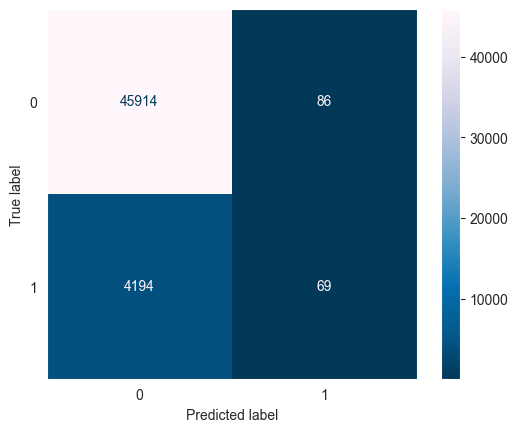

In [290]:
# visualisasi confusion matrix
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(def_cb, X_test_dropped, y_test_dropped, cmap='PuBu_r')) #YlOrRd
sns.set_style({'axes.grid': False})

Dari nilai-nilai pada tabel maupun plot di atas, dapat dibuat perumpamaan sebagai berikut:
- Dari 46000 debitur yang melunasi pembayaran, masih ada 86 debitur yang terprediksi gagal bayar. Hal ini dapat memberikan resiko seperti mencemarkan nama perusahaan dan kehilangan kepercayaan debitur.  
- Sementara itu, dari 4263 debitur yang gagal bayar, diketahui hanya ada 69 yang terprediksi sesuai. Hal ini merupakan hal yang sangat fatal dan beresiko tinggi, yakni dapat membiarkan debitur yang seharusnya dalam kondisi *default* menjadi tidak terdeteksi dan dapat `merugikan perusahaan` dalam sisi mengganti rugi angsuran serta kehilangan kepercayaan dari partner bisnis terkait.

Dalam hal ini, kita mungkin lebih ingin memaksimalkan nilai `recall` (ingin meminimalisir False Negatives) untuk menghindari adanya debitur *default* yang tidak terdeteksi. Namun kita juga membutuhkan nilai precision yang baik jika perusahaan ingin menganalisis masing-masing `individu lebih lanjut` dan menangani masalah mereka.

Secara garis besar, model cukup dalam memprediksi dan mengetahui gambaran umum mengenai rasio maupun ciri debitur *default* (tergambarkan dengan AUC score 74). Begitu juga ketika ingin memprediksi debitur yang telah membayar kredit, model dapat bekerja cukup baik dengan nilai f1 score sebesar 96%. Namun, model sangat buruk dalam memprediksi target yang kami inginkan, yakni memiliki recall score hanya sebesar 2% yang menandakan performa model yang buruk. 

In [293]:
print('Sum of FPR:',fpr_tpr['FPR'].sum()) #FPR = FP / (FP + TN)
print('Sum of TPR:',fpr_tpr['TPR'].sum()) #TPR = TP / (TP + FN)

Sum of FPR: 2183.0365652173914
Sum of TPR: 3903.3298146844945


Pada penjabaran ini diketahui bahwa TPR memiliki jumlah yang lebih tinggi dibandingkan FPR. Hal ini menunjukkan indikasi yang cukup karena hasil prediksi memiliki lebih banyak mendapatkan hasil yang benar atau True Positive. Namun, model tetap memberikan nilai FPR yang juga sangat tinggi yang membuatnya menjadi tidak baik.

Selanjutnya analisis akan dilanjutkan dengan membandingkan kolom data test (dengan keterangan kolom asli) dengan hasil prediksi untuk melihat data apa yang memiliki tendensi untuk diprediksi benar oleh model dan data seperti apa yang cenderung salah. 

### True - False Result Analysis

Pada bagian ini akan dilakukan perbandingan dari hasil prediksi terhadap data tes asli.

In [300]:
# membuat menjadi 1 dimensi
y_test_dropped = y_test_dropped.ravel()  # Flatten the array to make it 1-dimensional
y_catboost_test_pred = y_catboost_test_pred.ravel()  # Flatten the array to make it 1-dimensional

# membuat dataframe hasil prediksi dan aktual
model_result = pd.DataFrame({
    'Default prediction (actual)':y_test_dropped,
    'Default prediction (pred)':y_catboost_test_pred
})
model_result.head()

,Default prediction (actual),Default prediction (pred)
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [301]:
print('Actual:',model_result['Default prediction (actual)'].sum())
print('Pred:',model_result['Default prediction (pred)'].sum())

Actual: 4263
Pred: 216


Jika dilihat dari perbandingan nilai aktual dan prediksi, diketahui bahwa model masih memiliki kekurangan dimana model memiliki tendensi untuk salah memperkirakan index 1 yang seharusnya berjumlah 4263 namun justru terdapat 216 prediksi mahasiswa lulus. Model `cenderung` untuk menanggap bahwa `seluruh debitur dapat melunasi pembayaran`. 

In [306]:
# melihat deskripsi model
model_result.reset_index(drop=True, inplace=True)
X_test_dropped.reset_index(drop=True, inplace=True)

# melihat hasil concat 
concatenated_result = pd.concat([model_result, X_test_dropped], axis=1)
concatenated_result.describe()

,Default prediction (actual),Default prediction (pred),CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,50263.000000,50263.000000,50263.000000,5.026300e+04,5.026300e+04,50263.000000,5.026300e+04,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.0,50263.00000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.0,50263.000000,50263.00000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.00000,50263.000000,50263.00000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000,50263.000000
mean,0.084814,0.004297,0.513121,1.780741e+05,6.191551e+05,27914.889670,5.560012e+05,0.020617,-14857.774367,-2466.444343,-4637.375624,-2868.759147,1.0,0.99998,0.241589,0.997752,0.285896,0.065575,2.278873,2.053081,2.031992,12.227921,0.015717,0.058114,0.046595,0.087341,0.274357,0.215964,0.519106,0.502321,1.426596,0.140720,1.408869,0.097428,-1014.388477,0.0,0.771124,0.00002,0.014364,0.008615,0.000139,0.099337,0.003840,0.00002,0.003760,0.00002,0.004536,0.003899,0.001532,0.012136,0.000438,0.009629,0.000597,0.000716,0.000458,0.006764,0.006844,0.033245,0.292601,0.260987,1.860573
std,0.278607,0.065414,0.765813,1.026852e+05,4.063567e+05,14525.626824,3.733823e+05,0.013538,3591.962377,2383.839612,3235.621087,1498.618848,0.0,0.00446,0.428051,0.047362,0.451845,0.247540,0.938184,0.503230,0.498147,3.277410,0.124381,0.233962,0.210772,0.282336,0.446194,0.411494,0.188881,0.195985,2.314672,0.437073,2.294051,0.358337,836.822876,0.0,0.420113,0.00446,0.118989,0.092416,0.011800,0.299118,0.061848,0.00446,0.061206,0.00446,0.067199,0.062325,0.039110,0.109495,0.020917,0.097657,0.024424,0.026753,0.021387,0.085065,0.101875,0.196334,0.977989,0.606760,1.804184
min,0.000000,0.000000,0.000000,2.700000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-25200.000000,-17912.000000,-22442.000000,-6258.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000,-4185.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.125000e+05,2.844000e+05,17316.000000,2.475000e+05,0.010006,-17595.500000,-3291.000000,-6961.000000,-4211.000000,1.0,1.00000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.403770,0.360613,0.000000,0.000000

In [313]:
# melihat hasil yang terprediksi benar  
concatenated_result[concatenated_result['Default prediction (actual)'] == concatenated_result['Default prediction (pred)']].head(10)

,Default prediction (actual),Default prediction (pred),NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,Cash loans,F,Y,Y,0,90000.0,900000.0,32017.5,900000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.015221,-13587,-1137,-5959.0,-3097,1,1,0,1,0,0,Sales staff,2.0,2,2,FRIDAY,16,0,0,0,0,0,0,Self-employed,0.314969,0.425893,1.0,0.0,1.0,0.0,-564.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
1,0,0,Cash loans,F,N,Y,0,225000.0,539959.5,33165.0,441000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.008625,-21800,-4124,-5964.0,-4420,1,1,0,1,0,0,Core staff,2.0,2,2,TUESDAY,13,0,0,0,0,0,0,Kindergarten,0.544239,0.533482,6.0,0.0,6.0,0.0,-1030.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,Revolving loans,F,N,Y,0,225000.0,270000.0,13500.0,270000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.018634,-8317,-550,-1873.0,-988,1,1,0,1,0,0,Private service staff,2.0,2,2,TUESDAY,14,1,1,0,0,0,0,Services,0.702810,0.344155,0.0,0.0,0.0,0.0,-564.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,Cash loans,F,N,N,0,180000.0,247275.0,19953.0,225000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010276,-17474,-2903,-10211.0,-1020,1,1,0,1,0,0,Sales staff,2.0,2,2,WEDNESDAY,12,0,0,0,0,0,0,Self-employed,0.790901,0.675413,0.0,0.0,0.0,0.0,-663.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,0,0,Cash loans,M,N,Y,1,360000.0,503266.5,52978.5,463500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.003541,-14925,-909,-2063.0,-4900,1,1,0,1,0,1,Laborers,3.0,1,1,WEDNESDAY,9,0,0,0,0,0,0,Industry: type 9,0.285898,0.656158,0.0,0.0,0.0,0.0,-1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
5,0,0,Cash loans,F,N,N,0,315000.0,675000.0,32602.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006305,-13523,-1624,-3583.0,-3642,1,1,1,1,0,0,Realty agents,2.0,3,3,SUNDAY,11,0,0,0,0,0,0,Services,0.508857,0.670652,1.0,1.0,1.0,0.0,-1033.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,Cash loans,M,N,N,0,405000.0,454500.0,44275.5,454500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.018029,-18796,-1128,-465.0,-2330,1,1,0,1,1,0,Laborers,2.0,3,3,SATURDAY,12,0,1,1,0,1,1,Business Entity Type 3,0.303548,0.403142,1.0,0.0,1.0,0.0,-1009.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
8,0,0,Cash loans,M,Y,Y,1,225000.0,314100.0,16164.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-16175,-2371,-849.0,-4169,1

Diketahui bahwa data tersebut adalah data yang cenderung diprediksi tepat oleh model. 

In [312]:
# melihat hasil yang terprediksi salah 
concatenated_result[concatenated_result['Default prediction (actual)'] != concatenated_result['Default prediction (pred)']].head(10)

,Default prediction (actual),Default prediction (pred),NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
7,1,0,Cash loans,F,N,Y,0,157500.0,521280.0,35392.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.016612,-12151,-704,-2447.0,-3284,1,1,1,1,1,0,Laborers,2.0,2,2,SATURDAY,12,0,0,0,1,1,0,School,0.129471,0.468660,0.0,0.0,0.0,0.0,-1496.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
28,1,0,Cash loans,M,Y,N,1,360000.0,835380.0,45445.5,675000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.046220,-12052,-4624,-4140.0,-4140,1,1,0,1,0,0,Managers,3.0,1,1,FRIDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.692637,0.113922,0.0,0.0,0.0,0.0,-1681.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
32,1,0,Cash loans,M,N,Y,2,270000.0,640080.0,29970.0,450000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.008575,-11249,-1467,-2388.0,-486,1,1,0,1,0,0,Laborers,4.0,2,2,THURSDAY,14,0,0,0,0,0,0,Transport: type 4,0.059992,0.544235,2.0,0.0,2.0,0.0,-789.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
40,1,0,Cash loans,M,N,Y,0,126000.0,284400.0,22599.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010966,-12869,-1485,-6998.0,-4667,1,1,0,1,0,0,Core staff,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Government,0.343368,0.380800,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
57,1,0,Cash loans,F,N,N,0,162000.0,402939.0,21987.0,306000.0,Unaccompanied,Working,Incomplete higher,Civil marriage,With parents,0.002134,-11859,-1408,-5076.0,-2566,1,1,0,1,0,0,Accountants,2.0,3,3,WEDNESDAY,10,0,0,0,0,1,1,Government,0.511038,0.631355,1.0,1.0,1.0,1.0,-1473.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0,6.0
70,1,0,Cash loans,F,N,Y,3,90000.0,499500.0,16240.5,499500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-11635,-1470,-2184.0,-2843,1,1,1,1,1,0,Core staff,5.0,3,3,WEDNESDAY,15,0,0,0,0,0,0,Kindergarten,0.148294,0.692559,1.0,0.0,1.0,0.0,-153.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
83,1,0,Cash loans,F,N,Y,2,135000.0,592560.0,32274.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.006852,-10946,-2582,-2810.0,-2366,1,1,0,1,0,0,Sales staff,4.0,3,3,SUNDAY,5,0,0,0,0,0,0,Business Entity Type 3,0.211531,0.301625,0.0,0.0,0.0,0.0,-1115.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
89,1,0,Cash loans,M,Y,N,2,180000.0,397017.0,20398.5,301500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.

Diketahui bahwa data tersebut adalah data yang cenderung diprediksi salah oleh model. Kita dapat melihat contoh data` False Positive serta False Negative` dari tabel tersebut. Namun, tidak dapat memastikan secara pasti fitur apa yang memengaruhi error dalam model ini. Maka dari itu untuk tahap selanjutnya, kami akan mengekstraksi *feature importance* untuk melihat pandangan model terhadap dataset. 

### Feature Importance

In [242]:
model_cb = CatBoostClassifier(iterations=100, random_seed=66, verbose = 0)
model_cb.fit(X_train_final, y_train_o)

# membuat tuple berisikan feature importance 
feature_importance_tuples = [(feature, importance) for feature, importance in zip(X_train_final.columns, feature_importance)]

# urutkan berdasarkan fitur terpenting
feature_importance_sorted = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# print hasil 
for feature, importance in feature_importance_sorted:
    print(f"{feature}: {importance}")

EXT_SOURCE_3: 20.273496101193935
EXT_SOURCE_2: 19.072147123176443
AMT_GOODS_PRICE: 5.980087407876743
DAYS_BIRTH: 5.826365276676213
AMT_CREDIT: 5.479517499228362
AMT_ANNUITY: 4.236689027830258
DAYS_EMPLOYED: 3.46864493911678
DAYS_LAST_PHONE_CHANGE: 3.2264922056968994
DAYS_ID_PUBLISH: 2.864376861767422
NAME_EDUCATION_TYPE_Higher education: 2.505984454852147
REGION_POPULATION_RELATIVE: 2.475265509622341
DAYS_REGISTRATION: 2.4672268763185956
AMT_INCOME_TOTAL: 2.343939229921756
CODE_GENDER_M: 1.993451950894514
HOUR_APPR_PROCESS_START: 1.6999364053945498
NAME_CONTRACT_TYPE_Revolving loans: 1.3128615017249832
FLAG_OWN_CAR_N: 1.0184944791431845
NAME_INCOME_TYPE_Working: 0.8781837688603936
NAME_EDUCATION_TYPE_Secondary / secondary special: 0.7287472111983241
NAME_FAMILY_STATUS_Married: 0.6927827966356629
OCCUPATION_TYPE_Core staff: 0.5301590308771499
CNT_CHILDREN_1: 0.45942911733126074
ORGANIZATION_TYPE_Self-employed: 0.4448797606585334
NAME_CONTRACT_TYPE_Cash loans: 0.42672720432610173
NAME_HO

Diketahui bahwa kolom-kolom berikut; 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'AMT_CREDIT' terhitung memiliki korelasi yang cukup tinggi terhadap target, sementara semakin bawah urutan kolom mengindikasikan bahwa kolom semakin tidak berelasi dengan target. 

- Kami telah mengetahui bahwa fitur terpenting adalah `external credit score`, yakni tingkatan yang diberikan oleh instansi kredit eksternal (dalam kasus perusahaan pembiayaan Indonesia, berarti skor kredit yang terdata dan oleh OJK) yang menggambarkan kemampuan membayar seorang debitur. Jika kita lihat pada tabel True-False sebelumnya, sepertinya debitur yang memiliki tendensi *default* memiliki skor sekitar 0.1.

- Fitur penting selanjutnya adalah harga barang, umur, serta jumlah pinjaman. Sebetulnya perlu dilakukan analisis mendalam mengenai fitur-fitur ini. Namun untuk sekarang, kami berasumsi bahwa debitur dengan 'AMT_CREDIT' yang jauh lebih tinggi dibandingkan 'AMT_GOODS_PRICE' terlihat memiliki kecenderungan untuk *default*--namun asumsi ini hanya berdasarkan tabel True-False yang sebelumnya telah ditampilkan. Selain itu, kita juga telah mengetahui sebelumnya dalam bagian EDA bahwa umur (`terutama yang lebih muda`) memengaruhi daya bayar seorang debitur. 

Dalam hal ini, fitur-fitur ini menjadi hal yang penting karena bisa jadi fitur ini dapat memberikan bias terhadap model sehingga menyebabkan kesalahan prediksi. Misalnya ada nilai skor dari sumber eksternal 2 yang tinggi, namun debitur yang sama memiliki skor rendah pada eksternal 3. Hal ini dapat menimbulkan bias karena belum tentu debitur akan melunaskan pembayarannya sesuai dengan skor tinggi dari sumber dari eksternal 2 (yang merupakan fitur prioritas model)--bisa jadi, debitur memiliki faktor lain (baik yang ada maupun tidak ada dalam dataset) yang lebih cocok dalam menggambarkan kemampuannya dalam pembayaran. Sebaliknya, `fitur yang saling kuat namun bertentangan` dapat membuat perhitungan menjadi dan tidak sesuai dengan dunia nyata. 

Diperlukan analisis korelasi data dengan lebih mendalam sehingga dapat mengatasi fitur dengan pengaruh tinggi agar tidak saling bertabrakan. Begitu juga, dapat dilakukan analisis untuk mereferensikan sebenarnya data apa saja yang mungkin dapat menganani hal tersebut dan belum tersedia dalam dataset/ sudah tersedia namun belum tertransformasikan dengan baik.

# VIII. Model Saving
Penyimpanan model serta file terkait untuk digunakan kedepannya.

In [311]:
# menyimpan model
with open('def_cb.pkl', 'wb') as file_1:
  pickle.dump(def_cb, file_1)

with open('cat_cols_drop.txt', 'w') as file_2:
  json.dump(cat_cols_drop, file_2)

with open('num_cols_drop.txt','w') as file_3:
  json.dump(num_cols_drop, file_3)

# IX. Model Inference


In [340]:
X_train_dropped.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,N,1,112500.0,358443.0,17563.5,252000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.010556,-11317,-1925,-1748.0,-3927,1,1,0,1,0,0,Medicine staff,3.0,3,3,TUESDAY,17,0,0,0,1,0,0,Industry: type 3,0.138867,0.542445,3.0,0.0,3.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
1,Cash loans,M,Y,Y,0,135000.0,1314117.0,38551.5,1147500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.003069,-18384,-8627,-508.0,-1930,1,1,0,1,1,0,Managers,2.0,3,3,SATURDAY,12,0,0,0,0,1,1,Business Entity Type 3,0.735934,0.695622,0.0,0.0,0.0,0.0,-1053.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cash loans,F,N,N,1,202500.0,900000.0,26316.0,900000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.011703,-10423,-1655,-10423.0,-2666,1,1,1,1,0,0,Accountants,3.0,2,2,MONDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.615774,0.420611,6.0,0.0,6.0,0.0,-1339.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,Revolving loans,F,N,Y,0,112500.0,270000.0,13500.0,270000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.007020,-8744,-350,-6451.0,-1168,1,1,0,1,0,0,Core staff,2.0,2,2,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 2,0.476293,0.713631,5.0,0.0,5.0,0.0,-152.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
5,Cash loans,M,Y,Y,1,225000.0,355500.0,28633.5,355500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-16492,-1115,-2924.0,-31,1,1,0,1,0,0,Drivers,3.0,2,1,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.518936,0.342529,3.0,1.0,3.0,0.0,-907.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0


In [338]:
# membuka model
with open('def_cb.pkl', 'rb') as file_1:
  def_cb_inf= pickle.load(file_1)

In [341]:
# membuat data dummy
data_inf = {
    'NAME_CONTRACT_TYPE': 'Cash loans',
    'CODE_GENDER': 'M',
    'FLAG_OWN_CAR': 'N',
    'FLAG_OWN_REALTY': 'N',
    'CNT_CHILDREN': 1,
    'AMT_INCOME_TOTAL': 112500.0,
    'AMT_CREDIT': 358443.0,
    'AMT_ANNUITY': 17563.5,
    'AMT_GOODS_PRICE': 252000.0,
    'NAME_TYPE_SUITE': 'Spouse, partner',
    'NAME_INCOME_TYPE': 'Working',
    'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
    'NAME_FAMILY_STATUS': 'Married',
    'NAME_HOUSING_TYPE': 'House / apartment',
    'REGION_POPULATION_RELATIVE': 0.010556,
    'DAYS_BIRTH': -11317,
    'DAYS_EMPLOYED': -1925,
    'DAYS_REGISTRATION': -1748.0,
    'DAYS_ID_PUBLISH': -3927,
    'FLAG_MOBIL': 1,
    'FLAG_EMP_PHONE': 1,
    'FLAG_WORK_PHONE': 0,
    'FLAG_CONT_MOBILE': 1,
    'FLAG_PHONE': 0,
    'FLAG_EMAIL': 0,
    'OCCUPATION_TYPE': 'Medicine staff',
    'CNT_FAM_MEMBERS': 3.0,
    'REGION_RATING_CLIENT': 3,
    'REGION_RATING_CLIENT_W_CITY': 3,
    'WEEKDAY_APPR_PROCESS_START': 'TUESDAY',
    'HOUR_APPR_PROCESS_START': 17,
    'REG_REGION_NOT_LIVE_REGION': 0,
    'REG_REGION_NOT_WORK_REGION': 0,
    'LIVE_REGION_NOT_WORK_REGION': 0,
    'REG_CITY_NOT_LIVE_CITY': 1,
    'REG_CITY_NOT_WORK_CITY': 0,
    'LIVE_CITY_NOT_WORK_CITY': 0,
    'ORGANIZATION_TYPE': 'Industry: type 3',
    'EXT_SOURCE_2': 0.138867,
    'EXT_SOURCE_3': 0.542445,
    'OBS_30_CNT_SOCIAL_CIRCLE': 3.0,
    'DEF_30_CNT_SOCIAL_CIRCLE': 0.0,
    'OBS_60_CNT_SOCIAL_CIRCLE': 3.0,
    'DEF_60_CNT_SOCIAL_CIRCLE': 0.0,
    'DAYS_LAST_PHONE_CHANGE': 0.0,
    'FLAG_DOCUMENT_2': 0,
    'FLAG_DOCUMENT_3': 1,
    'FLAG_DOCUMENT_4': 0,
    'FLAG_DOCUMENT_5': 0,
    'FLAG_DOCUMENT_6': 0,
    'FLAG_DOCUMENT_7': 0,
    'FLAG_DOCUMENT_8': 0,
    'FLAG_DOCUMENT_9': 0,
    'FLAG_DOCUMENT_10': 0,
    'FLAG_DOCUMENT_11': 0,
    'FLAG_DOCUMENT_12': 0,
    'FLAG_DOCUMENT_13': 0,
    'FLAG_DOCUMENT_14': 0,
    'FLAG_DOCUMENT_15': 0,
    'FLAG_DOCUMENT_16': 0,
    'FLAG_DOCUMENT_17': 0,
    'FLAG_DOCUMENT_18': 0,
    'FLAG_DOCUMENT_19': 0,
    'FLAG_DOCUMENT_20': 0,
    'FLAG_DOCUMENT_21': 0,
    'AMT_REQ_CREDIT_BUREAU_HOUR': 0.0,
    'AMT_REQ_CREDIT_BUREAU_DAY': 0.0,
    'AMT_REQ_CREDIT_BUREAU_WEEK': 0.0,
    'AMT_REQ_CREDIT_BUREAU_MON': 0.0,
    'AMT_REQ_CREDIT_BUREAU_QRT': 0.0,
    'AMT_REQ_CREDIT_BUREAU_YEAR': 4.0
}
data_inf = pd.DataFrame([data_inf])
data_inf

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,N,1,112500.0,358443.0,17563.5,252000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.010556,-11317,-1925,-1748.0,-3927,1,1,0,1,0,0,Medicine staff,3.0,3,3,TUESDAY,17,0,0,0,1,0,0,Industry: type 3,0.138867,0.542445,3.0,0.0,3.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [345]:
# prediksi dat inference
y_inf_pred = def_cb_inf.predict(data_inf)

#melihat hasil
if y_inf_pred >= 0.5:
    print('Likely to Default their Payment')
else:
    print ('Likely to Repay their Loan')   

Likely to Repay their Loan


Model sudah dapat berfungsi dengan baik walau dalam prediksinya masih membutuhkan beberapa evaluasi.

# X. Conclusion



### Conclusion

Pada proyek ini, kami telah membuat model *machine learning* untuk memprediksi debitur Home Credit dalam klasifikasi gagal bayar atau tidak. Berikut adalah kesimpulan serta analisis dari proyek ini:

**1. Data Exploration:**

- Debitur yang melakukan gagal bayar berjumlah lebih sedikit dengan perbandingan 1 : 4.
- Ada hubungan antara 'EXT_SOURCE...' yang menandakan daya bayar debitur dengan target.
- Ada hubungan antara umur dengan target, dimana ditemui bahwa debitur yang lebih muda cenderung untuk melakukan gagal bayar.
- Kolom mengenai informasi aset (rumah) debitur memiliki jumlah missing value yang sangat tinggi (saling berhubungan). Oleh karena itu, kolom-kolom tersebut disingkirkan dari dataset dengan pertimbangan agar tidak menimbulkan kesalahan asumsi (bila diimputasi dengan nilai lain) serta agar tidak mengurangi banyak kolom (apabila kami memutuskan untuk menyingkirkan baris dibandingkan kolom).

**2. Model Analysis:**
- Model terbaik yang dipilih adalah CatBoost dengan pertimbangan utama karena memiliki nilai ROC-AUC yang paling tinggi. Metrik ini dipilih karena dianggap dapat mewakilkan performa keseluruhan model yang diatih menggunakan data yang tidak seimbang. Selain metrik tersebut, model ini juga memiliki nilai recall score yang sedikit lebih baik dibandingkan model lainnya. 
- Jika dilihat berdasarkan perbandingan train dan test, model train memiliki nilai akurasi 92% sementara model test memiliki akurasi 92%. Namun hal ini tidak selalu menggambarkan suatu model yang good-fit. 
- Hasil evaluasi model memberikan nilai yang yang tidak seimbang antara prediksi indeks 0 dan 1. Hal ini diakibarkan karena dataset memiliki ketidakseimbangan antara dua klasifikasi tersebut. Dapat dilakukan manipulasi untuk undersampling/ oversampling data sebagai bahan evaluasi.

**3.  Domain:**

Dalam konteks model prediksi, prediksi *default payment* seharusnya membutuhkan nilai recall yang tinggi karena keperluan untuk meminimalisir jumlah False Negatives (ketika debitur *default* salah terprediksi seakan telah membayar).

Sementara itu dengan membandingkan konteks tersebut terhadap model yang telah kami buat, jika dilihat dari perbandingan nilai aktual dan prediksi, diketahui bahwa model masih memiliki kekurangan dimana model memiliki tendensi untuk salah memperkirakan index 1 atau *default* yang terlihat dari jumlah prediksi yang seharusnya berjumlah 4263 namun hanya tergambarkan 216 pada data prediksi. 

Model cenderung untuk mengklasifikasikan debitur gagal bayar sebagai tidak gagal bayar. Hal ini dapat memberikan kerugian serta resiko yang lebih besar dibandingkan kesalahan prediksi pada klasifikasi lainnya. Kesalahan prediksi dapat menyebabkan kerugian dimana kelompok debitur yang seharusnya sudah mendapatkan status *default* dapat terus meminjam dan menggunakan kredit. Kesalahan tersebut dapat menimbulkan kerugian perusahaan pembiayaan yang harus membayar tunggakan yang tidak dapat dibayarkan oleh debitur yang gagal bayar. Selain itu, perusahaan juga dapat kehilangan kepercayaan dari vendor dan partner bisnis yang bekerja sama dengan perusahaan pembiayaan. 

Dengan demikian, kami merasa model memang memiliki kelebihan yang dapat membantu perusahaan penerbit kartu kredit dalam memprediksi kondisi telah membayar atau index 0 dengan cukup baik (f1-score skitar 96%). Namun kami `tidak merekomendasikan` untuk menggunakan model ini sebagai referensi untuk memprediksi kondisi *default* karena dapat memberikan resiko yang besar. 

**4. Further Improvement:**

- Model dapat mencoba menyaring fitur-fitur yang lebih relevan. Dalam proyek ini, karena model yang akan digunakan adalah beberapa model, pemilihan fitur mungkin menjadi kurang fokus sehingga tidak tersaring dengan baik. Untuk selanjutnya, selektor yang akan dipakai juga harusnya lebih sesuai dan berfokus pada model yang ingin dilatih.

- Untuk selanjutnya, bila tidak dianggap menjadi hal yang akan memakan waktu, dapat juga dilakukan tuning dengan pencarian `random/ grid` pada model-model lainnya. Karena bisa jadi model lain memiliki potensi akurasi yang lebih tinggi bila kita juga melakukan *tuning* pada hyperparameternya. 

- Menggunakan SMOTENC atau teknik lainnya untuk untuk membuat dataset menjadi lebih seimbang. Teknik ini seharusnya dapat menaikkan performa model secara signifikan, namun belum kami terapkan karena keterbatasan waktu. 

- Dapat dilakukan transformasi, normalisasi, serta proses lainnya yang mungkin lebih sesuai dengan data guna membuat model dapat bekerja dengan lebih optimal. 

- Memperbarui `data yang belum tersedia`. Sebelumnya telah diketahui bahwa beberapa kolom memiliki data tidak terisi yang mencapai hingga 70% dari total baris data. Data tersebut dapat dicoba untk dilengkapi dengan *follow-up* client. 

- Untuk evaluasi selanjutnya dapat mencoba menggunakan `tabel lain` yang sepertinya juga memiliki peran penting dalam memprediksi pembayaran debitur. Seperti tabel 'Bureau', 'Previous Application', dan lainnya yang tidak sempat kami sertakan karena keterbatasan waktu. 

### Suggestion

Telah dilakukan eksplorasi data serta permodelan dimana kami mendapatkan bahwa  fitur-fitur sebagai berikut;'EXT_SOURCE_3', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'AMT_CREDIT' terhitung memiliki korelasi yang cukup tinggi terhadap target. Berdasarkan hal tersebut, kami membentuk beberapa rekomendasi yang dapat dipertimbangkan sebagai strategi perusahaan selanjutnya:

1. Fokus pada riwayat kredit debitur: 'EXT_SOURCE_3' dan 'EXT_SOURCE_2' adalah indikator penting mengenai kelayakan kredit pelamar. Kita dapat mengutamakan faktor ini karena meskipun debitur terlihat aman secara portfolio dan aset, terdapat potensi bahwa mereka memiliki kecenderungan untuk tidak dapat memenuhi kewajiban pembayaran hutang.

2. Pertimbangkan jumlah pinjaman dan harga barang: 'AMT_GOODS_PRICE' dan 'AMT_CREDIT' memainkan peranan penting dalam mengevaluasi kelayakan pinjaman dan risiko. Perusahaan harus berhati-hati mengevaluasi kemampuan keuangan peminjam dan nilai jaminan sebelum menyetujui pinjaman.

3. Usia sebagai faktor penting: 'DAYS_BIRTH' (usia peminjam) adalah fitur yang berpengaruh. Hal ini menunjukkan bahwa kreditor perlu mempertimbangkan usia peminjam saat menilai kemampuan mereka untuk membayar pinjaman. Hal ini mungkin juga dapat dipengaruhi oleh faktor sosial seperti kestabilan ekonomi pada debitur dengan umur tertentu--maupun faktor psikologis kedewasaan orang itu sendiri. 

Selain itu, tentunya diperlukan juga perkuatan pada analisis kredit, monitor dan evaluasi kinerja, serta peningkatan layanan kerja. Hal ini akan membantu memastikan bahwa keputusan pemberian pinjaman didasarkan pada analisis yang komprehensif, kinerja portofolio pinjaman terus dipantau secara berkala, dan pelayanan kepada pelanggan ditingkatkan untuk memenuhi kebutuhan mereka. Dengan pendekatan menyeluruh, perusahaan pembiayaan dapat meningkatkan efektivitas dan efisiensi dalam mengelola risiko kredit dan memberikan layanan terbaik kepada para pelanggan.
